In [607]:
#!pip install matplotlib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
df = pd.read_csv ('PEDE_PASSOS_DATASET_FIAP.csv',delimiter=';')

In [3]:
df.head()

,INSTITUICAO_ENSINO_ALUNO_2020,NOME,IDADE_ALUNO_2020,ANOS_PM_2020,FASE_TURMA_2020,PONTO_VIRADA_2020,INDE_2020,INDE_CONCEITO_2020,PEDRA_2020,DESTAQUE_IEG_2020,...,IPP_2022,REC_AVA_1_2022,REC_AVA_2_2022,REC_AVA_3_2022,REC_AVA_4_2022,INDICADO_BOLSA_2022,PONTO_VIRADA_2022,IPV_2022,IAN_2022,NIVEL_IDEAL_2022
0,Escola Pública,ALUNO-1,11,2,2H,Não,7.883752,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,ALUNO-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.625000,Mantido na Fase + Bolsa,Mantido na Fase atual,NaN,NaN,Sim,Não,7.916665,5.0,Fase 2 (5º e 6º ano)
2,Escola Pública,ALUNO-3,12,2,3H,Não,7.856389666666666,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Escola Pública,ALUNO-4,10,2,1D,Não,5.076252,D,Quartzo,Ponto a melhorar em 2021: Melhorar a sua entre...,...,6.250000,Promovido de Fase,Mantido na Fase atual,Promovido de Fase,NaN,Não,Não,8.055553,5.0,Fase 3 (7º e 8º ano)
4,Escola Pública,ALUNO-5,10,1,2M,Não,8.077085,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,...,6.458333,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,NaN,Não,Não,7.833337,5.0,Fase 3 (7º e 8º ano)


# Tivemos adição de colunas novas no dataset ao longo do tempo 🤔

In [4]:
len(df.columns[df.columns.str.contains('2020')])

18

In [5]:
df.columns[df.columns.str.contains('2020')]

Index(['INSTITUICAO_ENSINO_ALUNO_2020', 'IDADE_ALUNO_2020', 'ANOS_PM_2020',
       'FASE_TURMA_2020', 'PONTO_VIRADA_2020', 'INDE_2020',
       'INDE_CONCEITO_2020', 'PEDRA_2020', 'DESTAQUE_IEG_2020',
       'DESTAQUE_IDA_2020', 'DESTAQUE_IPV_2020', 'IAA_2020', 'IEG_2020',
       'IPS_2020', 'IDA_2020', 'IPP_2020', 'IPV_2020', 'IAN_2020'],
      dtype='object')

In [6]:
len(df.columns[df.columns.str.contains('2021')])

20

In [7]:
df.columns[df.columns.str.contains('2021')]

Index(['FASE_2021', 'TURMA_2021', 'INSTITUICAO_ENSINO_ALUNO_2021',
       'SINALIZADOR_INGRESSANTE_2021', 'PEDRA_2021', 'INDE_2021', 'IAA_2021',
       'IEG_2021', 'IPS_2021', 'IDA_2021', 'IPP_2021', 'REC_EQUIPE_1_2021',
       'REC_EQUIPE_2_2021', 'REC_EQUIPE_3_2021', 'REC_EQUIPE_4_2021',
       'PONTO_VIRADA_2021', 'IPV_2021', 'IAN_2021', 'NIVEL_IDEAL_2021',
       'DEFASAGEM_2021'],
      dtype='object')

In [8]:
len(df.columns[df.columns.str.contains('2022')])

30

In [9]:
df.columns[df.columns.str.contains('2022')]

Index(['FASE_2022', 'TURMA_2022', 'ANO_INGRESSO_2022', 'BOLSISTA_2022',
       'INDE_2022', 'CG_2022', 'CF_2022', 'CT_2022', 'PEDRA_2022',
       'DESTAQUE_IEG_2022', 'DESTAQUE_IDA_2022', 'DESTAQUE_IPV_2022',
       'IAA_2022', 'IEG_2022', 'IPS_2022', 'IDA_2022', 'NOTA_PORT_2022',
       'NOTA_MAT_2022', 'NOTA_ING_2022', 'QTD_AVAL_2022', 'IPP_2022',
       'REC_AVA_1_2022', 'REC_AVA_2_2022', 'REC_AVA_3_2022', 'REC_AVA_4_2022',
       'INDICADO_BOLSA_2022', 'PONTO_VIRADA_2022', 'IPV_2022', 'IAN_2022',
       'NIVEL_IDEAL_2022'],
      dtype='object')

# Funções reutilizáveis 🤓

In [10]:
def filter_columns(df, filters: list): # adiciono no array o padrão que existe nas colunas e que não quero que tenha na saída final
    selected_columns = [True] * len(df.columns)  # Inicializa todas as colunas como True
    for index, column in enumerate(df.columns):
        if any(filter in column for filter in filters): selected_columns[index] = False
    return df[df.columns[selected_columns]]

In [11]:
def cleaning_dataset(df):
  _df = df.dropna(subset=df.columns.difference(['NOME']), how='all') # executa o dropna para todas as colunas sem visualizar a coluna NOME
  _df = _df[~_df.isna().all(axis=1)] # remove linhas com apenas NaN, se tiver algum dado na linha não remove
  return _df

In [12]:
def plot_exact_counter(size, x, y, df) -> None:
  import matplotlib.pyplot as plt
  import seaborn as sns
  import pandas as pd

  plt.figure(figsize=size)
  barplot = plt.bar(y.index, y.values)
  plt.xlabel(x)
  plt.ylabel('Count')

  for index, value in enumerate(y.values):
        plt.text(index, value, round(value, 2), color='black', ha="center")

  plt.show()

In [13]:
def analyse_corr(df):
  import seaborn as sns
  import matplotlib.pyplot as plt

  df = df.apply(pd.to_numeric, errors='coerce')

  corr_matrix = df.corr()
  plt.figure(figsize=(10, 8))
  sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
  plt.show()

# Separando os Data Frames por Ano

In [14]:
df_2020 = filter_columns(df, ['2021', '2022'])

In [15]:
len(df_2020) # com NaN

1349

In [16]:
df_2020 = cleaning_dataset(df_2020)
len(df_2020)

728

In [17]:
df_2020['FASE_TURMA_2020'].value_counts()

FASE_TURMA_2020
8A      24
7B      21
1G      17
2M      17
3B      16
        ..
2J       6
4E       5
6C       5
5X       2
D207     1
Name: count, Length: 63, dtype: int64

In [19]:
df_2020.head()

,INSTITUICAO_ENSINO_ALUNO_2020,NOME,IDADE_ALUNO_2020,ANOS_PM_2020,FASE_TURMA_2020,PONTO_VIRADA_2020,INDE_2020,INDE_CONCEITO_2020,PEDRA_2020,DESTAQUE_IEG_2020,DESTAQUE_IDA_2020,DESTAQUE_IPV_2020,IAA_2020,IEG_2020,IPS_2020,IDA_2020,IPP_2020,IPV_2020,IAN_2020
0,Escola Pública,ALUNO-1,11,2,2H,Não,7.883752,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,8.500020000000001,8.7,7.5,7,5.9375,7.75,10
2,Escola Pública,ALUNO-3,12,2,3H,Não,7.856389666666666,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,7.91667,8.9,7.5,5.5,8.125,8.111113333333334,10
3,Escola Pública,ALUNO-4,10,2,1D,Não,5.076252,D,Quartzo,Ponto a melhorar em 2021: Melhorar a sua entre...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Ponto a melhorar em 2021: Integrar-se mais aos...,8.000020000000001,4.1,6.875,0,7.1875,7.75,5
4,Escola Pública,ALUNO-5,10,1,2M,Não,8.077085,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Seu destaque em 2020: As suas boas notas na Pa...,Seu destaque em 2020: A sua boa integração aos...,7.50002,8,7.5,7.5,8.4375,8.166665,10
7,Rede Decisão/União,ALUNO-8,14,3,4L,Sim,8.381390666666666,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,8.33334,9.9,4.375,7.333333333333333,8.749999999999998,8.94445,10


In [20]:
df_2021 = filter_columns(df, ['2020', '2022'])
df_2021 = cleaning_dataset(df_2021)
df_2021.head()

,NOME,FASE_2021,TURMA_2021,INSTITUICAO_ENSINO_ALUNO_2021,SINALIZADOR_INGRESSANTE_2021,PEDRA_2021,INDE_2021,IAA_2021,IEG_2021,IPS_2021,...,IPP_2021,REC_EQUIPE_1_2021,REC_EQUIPE_2_2021,REC_EQUIPE_3_2021,REC_EQUIPE_4_2021,PONTO_VIRADA_2021,IPV_2021,IAN_2021,NIVEL_IDEAL_2021,DEFASAGEM_2021
0,ALUNO-1,2.0,G,Rede Decisão,Ingressante,Ametista,7.319,7.5,6.3,6.9,...,7.7,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não avaliado,Não,8.1,5.0,Nível 3 (7o e 8o ano),-1.0
2,ALUNO-3,3.0,F,Escola Pública,Veterano,Ametista,7.021,7.1,6.9,6.3,...,7.3,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não avaliado,Não,7.2,10.0,Nível 3 (7o e 8o ano),0.0
4,ALUNO-5,2.0,L,Escola Pública,Veterano,Ametista,7.399,7.4,7.5,7.5,...,8.5,Promovido de Fase,Mantido na Fase atual,Mantido na Fase atual,Não avaliado,Não,7.4,10.0,Nível 2 (5o e 6o ano),0.0
7,ALUNO-8,5.0,L,Rede Decisão,Veterano,Topázio,8.269,8.8,8.6,7.5,...,8.0,Promovido de Fase + Bolsa,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não,8.5,10.0,Nível 5 (1o EM),0.0
10,ALUNO-11,1.0,A,Rede Decisão,Veterano,Topázio,8.990,9.0,10.0,6.3,...,7.7,Promovido de Fase,Mantido na Fase atual,Mantido na Fase atual,Não avaliado,Sim,9.7,10.0,Nível 1 (4o ano),0.0


In [21]:
df_2021['FASE_2021'].value_counts()

FASE_2021
2.0    162
1.0    136
0.0    122
3.0    115
4.0     59
5.0     50
6.0     23
7.0     19
Name: count, dtype: int64

In [22]:
df_2022 = filter_columns(df, ['2020', '2021'])
df_2022 = cleaning_dataset(df_2022)
df_2022.head()

,NOME,FASE_2022,TURMA_2022,ANO_INGRESSO_2022,BOLSISTA_2022,INDE_2022,CG_2022,CF_2022,CT_2022,PEDRA_2022,...,IPP_2022,REC_AVA_1_2022,REC_AVA_2_2022,REC_AVA_3_2022,REC_AVA_4_2022,INDICADO_BOLSA_2022,PONTO_VIRADA_2022,IPV_2022,IAN_2022,NIVEL_IDEAL_2022
1,ALUNO-2,0.0,K,2022.0,Não,7.675509,245.0,66.0,6.0,Ametista,...,5.625000,Mantido na Fase + Bolsa,Mantido na Fase atual,NaN,NaN,Sim,Não,7.916665,5.0,Fase 2 (5º e 6º ano)
3,ALUNO-4,2.0,J,2022.0,Não,7.117065,451.0,69.0,3.0,Ametista,...,6.250000,Promovido de Fase,Mantido na Fase atual,Promovido de Fase,NaN,Não,Não,8.055553,5.0,Fase 3 (7º e 8º ano)
4,ALUNO-5,2.0,L,2019.0,Não,7.232336,415.0,61.0,12.0,Ametista,...,6.458333,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,NaN,Não,Não,7.833337,5.0,Fase 3 (7º e 8º ano)
5,ALUNO-6,2.0,K,2022.0,Não,7.741669,221.0,35.0,2.0,Ametista,...,6.250000,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,NaN,Não,Não,7.500000,10.0,Fase 2 (5º e 6º ano)
6,ALUNO-7,1.0,U,2022.0,Não,7.406743,357.0,93.0,7.0,Ametista,...,5.937500,Promovido de Fase,Promovido de Fase,NaN,NaN,Não,Não,7.916670,5.0,Fase 2 (5º e 6º ano)


In [23]:
df_2022['FASE_2022'].value_counts()

FASE_2022
1.0    192
0.0    190
2.0    155
3.0    148
4.0     76
5.0     60
7.0     23
6.0     18
Name: count, dtype: int64

# ***PARTE VICTOR***


### [Tratamento DF] Ajustes nos DF para junção dos 3.

In [24]:
print(df_2020.columns)

Index(['INSTITUICAO_ENSINO_ALUNO_2020', 'NOME', 'IDADE_ALUNO_2020',
       'ANOS_PM_2020', 'FASE_TURMA_2020', 'PONTO_VIRADA_2020', 'INDE_2020',
       'INDE_CONCEITO_2020', 'PEDRA_2020', 'DESTAQUE_IEG_2020',
       'DESTAQUE_IDA_2020', 'DESTAQUE_IPV_2020', 'IAA_2020', 'IEG_2020',
       'IPS_2020', 'IDA_2020', 'IPP_2020', 'IPV_2020', 'IAN_2020'],
      dtype='object')


In [25]:
import re

#Separa o campo Fase e Turma do ano de 2020 em 2

# Usando regex para extrair números e letras
df_2020['FASE_2020'] = df_2020['FASE_TURMA_2020'].str.extract(r'(\d+)')  # Extrai números
df_2020['TURMA_2020'] = df_2020['FASE_TURMA_2020'].str.extract(r'(\D+)')  # Extrai letras

In [26]:
df_2020['FASE_2020'].value_counts()

FASE_2020
1      172
2      155
3      122
0       82
4       55
5       54
7       33
6       30
8       24
207      1
Name: count, dtype: int64

In [27]:
#Remove registro da FASE = '207' O registro do aluna estava com informações inconsistentes.

# Filtrando o registro onde a coluna "Fase" é igual a 207
filtro = df_2020[df_2020['FASE_2020'] == '207']

# Exibindo o resultado
print(filtro)

#Removerndo o Registro:
df_2020 = df_2020.drop(df_2020[df_2020['FASE_2020'] == '207'].index)

     INSTITUICAO_ENSINO_ALUNO_2020        NOME IDADE_ALUNO_2020 ANOS_PM_2020  \
1258                          V202  ALUNO-1259             D108         D971   

     FASE_TURMA_2020 PONTO_VIRADA_2020 INDE_2020 INDE_CONCEITO_2020  \
1258            D207             D9600      D980            D9891/2   

     PEDRA_2020 DESTAQUE_IEG_2020  ... DESTAQUE_IPV_2020 IAA_2020 IEG_2020  \
1258   D9891/2A              D301  ...               NaN     D910     V920   

     IPS_2020 IDA_2020 IPP_2020 IPV_2020 IAN_2020 FASE_2020 TURMA_2020  
1258     D930     D940     D950     D960     D970       207          D  

[1 rows x 21 columns]


In [28]:
print('207' in df_2020['FASE_2020'].values)

False


In [29]:
df_2020['FASE_2020'].value_counts()


FASE_2020
1    172
2    155
3    122
0     82
4     55
5     54
7     33
6     30
8     24
Name: count, dtype: int64

In [30]:
#Renomear as colunas de Recomendação do df 2022 para ficar igual a 2021 

df_2022.rename(columns={'REC_AVA_1_2022': 'REC_EQUIPE_1_2022'}, inplace=True)
df_2022.rename(columns={'REC_AVA_2_2022': 'REC_EQUIPE_2_2022'}, inplace=True)
df_2022.rename(columns={'REC_AVA_3_2022': 'REC_EQUIPE_3_2022'}, inplace=True)
df_2022.rename(columns={'REC_AVA_4_2022': 'REC_EQUIPE_4_2022'}, inplace=True)

### [Tratamento DF] - Junta os 3 df em um unico

In [31]:


import re

# Função para remover o sufixo do ano das colunas
def padronizar_colunas(df_concat):
    df_concat.columns = [re.sub(r'_\d{4}$', '', col) for col in df_concat.columns]
    return df_concat

# Padronizar os nomes das colunas
df_2020 = padronizar_colunas(df_2020)
df_2021 = padronizar_colunas(df_2021)
df_2022 = padronizar_colunas(df_2022)

# Adicionar a coluna do ano
df_2020["ANO"] = 2020
df_2021["ANO"] = 2021
df_2022["ANO"] = 2022

# Concatenar os DataFrames
df_concat = pd.concat([df_2020, df_2021, df_2022], ignore_index=True)

In [32]:
# Removendo a coluna 'FASE_TURMA' diretamente no DataFrame original
df_concat.drop('FASE_TURMA', axis=1, inplace=True)

In [33]:
colunas = df_concat.columns
print(colunas)

Index(['INSTITUICAO_ENSINO_ALUNO', 'NOME', 'IDADE_ALUNO', 'ANOS_PM',
       'PONTO_VIRADA', 'INDE', 'INDE_CONCEITO', 'PEDRA', 'DESTAQUE_IEG',
       'DESTAQUE_IDA', 'DESTAQUE_IPV', 'IAA', 'IEG', 'IPS', 'IDA', 'IPP',
       'IPV', 'IAN', 'FASE', 'TURMA', 'ANO', 'SINALIZADOR_INGRESSANTE',
       'REC_EQUIPE_1', 'REC_EQUIPE_2', 'REC_EQUIPE_3', 'REC_EQUIPE_4',
       'NIVEL_IDEAL', 'DEFASAGEM', 'ANO_INGRESSO', 'BOLSISTA', 'CG', 'CF',
       'CT', 'NOTA_PORT', 'NOTA_MAT', 'NOTA_ING', 'QTD_AVAL',
       'INDICADO_BOLSA'],
      dtype='object')


In [34]:
# Verificando os tipos de dados das colunas
tipos_de_dados = df_concat.dtypes

print(tipos_de_dados)

INSTITUICAO_ENSINO_ALUNO     object
NOME                         object
IDADE_ALUNO                  object
ANOS_PM                      object
PONTO_VIRADA                 object
INDE                         object
INDE_CONCEITO                object
PEDRA                        object
DESTAQUE_IEG                 object
DESTAQUE_IDA                 object
DESTAQUE_IPV                 object
IAA                          object
IEG                          object
IPS                          object
IDA                          object
IPP                          object
IPV                          object
IAN                          object
FASE                         object
TURMA                        object
ANO                           int64
SINALIZADOR_INGRESSANTE      object
REC_EQUIPE_1                 object
REC_EQUIPE_2                 object
REC_EQUIPE_3                 object
REC_EQUIPE_4                 object
NIVEL_IDEAL                  object
DEFASAGEM                   

In [35]:
# Substituindo '#NULO!' por NaN

df_concat.replace('#NULO!', np.nan, inplace=True)

In [36]:
#Altera e Padroniza os campos de Indicadores 

df_concat['IAA'] = df_concat['IAA'].astype(float).round(2)
df_concat['IAN'] = df_concat['IAN'].astype(float).round(2)
df_concat['IDA'] = df_concat['IDA'].astype(float).round(2)
df_concat['IEG'] = df_concat['IEG'].astype(float).round(2)
df_concat['INDE'] = df_concat['INDE'].astype(float).round(2)
df_concat['IPP'] = df_concat['IPP'].astype(float).round(2)
df_concat['IPS'] = df_concat['IPS'].astype(float).round(2)
df_concat['IPV'] = df_concat['IPV'].astype(float).round(2)
df_concat['FASE'] = df_concat['FASE'].astype(float).round(0)
df_concat['FASE'] = df_concat['FASE'].astype(int)


In [37]:
df_concat['FASE'].value_counts()

FASE
1    500
2    472
0    394
3    385
4    190
5    164
7     75
6     71
8     24
Name: count, dtype: int64

In [38]:
df_concat['TURMA'].value_counts()

TURMA
A    311
B    243
F    193
L    169
G    151
M    127
C    121
J    116
D    115
E    101
R     95
N     92
K     90
H     84
P     67
I     40
U     38
Q     35
O     22
S     21
T     16
Y     10
Z      9
V      7
X      2
Name: count, dtype: int64

#Iniciando as Análises

In [39]:
df_concat.describe()

,INDE,IAA,IEG,IPS,IDA,IPP,IPV,IAN,FASE,ANO,DEFASAGEM,ANO_INGRESSO,CG,CF,CT,NOTA_PORT,NOTA_MAT,NOTA_ING,QTD_AVAL
count,2273.000000,2275.000000,2275.000000,2275.000000,2275.000000,2275.000000,2275.000000,2275.000000,2275.000000,2275.000000,686.000000,862.000000,862.000000,862.000000,862.000000,860.000000,860.000000,285.000000,862.000000
mean,7.071786,8.263969,7.497943,6.831503,5.956747,6.929635,7.294207,6.889011,2.339341,2021.059341,-0.752187,2020.496520,431.500000,75.396752,6.617169,5.796318,6.306628,5.839942,3.056845
std,1.200077,2.012042,2.205931,1.296446,2.432548,1.542681,1.505384,2.506651,1.911640,0.833814,0.792181,1.787649,248.982262,52.314184,3.989485,2.422292,2.092551,2.992093,0.775806
min,2.470000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.500000,0.000000,2020.000000,-4.000000,2016.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000
25%,6.400000,7.920000,6.300000,6.250000,4.500000,6.250000,6.765000,5.000000,1.000000,2020.000000,-1.000000,2019.000000,216.250000,30.000000,3.000000,4.316667,5.166667,3.500000,2.000000
50%,7.280000,8.750000,8.100000,7.500000,6.330000,7.300000,7.500000,5.000000,2.000000,2021.000000,-1.000000,2021.000000,431.500000,66.500000,6.000000,6.000000,6.650000,6.266667,3.000000
75%,7.940000,9.500000,9.200000,7.500000,7.670000,7.920000,8.170000,10.000000,3.000000,2022.000000,0.000000,2022.000000,646.750000,118.000000,9.750000,7.833333,7.833333,8.500000,4.000000
max,9.710000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,8.000000,2022.000000,3.000000,2022.000000,862.000000,192.000000,18.000000,10.000000,10.000000,10.000000,4.000000


In [40]:
import plotly.express as px

## ***Comparação Indicadores versus Fase e Ano***

### **Total Alunos por Fase e Turma**

In [41]:

# Agrupar por FASE e ANO, contar o número de alunos
total_alunos = df_concat.groupby(['FASE', 'ANO']).size().reset_index(name='Total_Alunos')

# Criar uma nova coluna com os valores formatados para os rótulos
total_alunos['TotalAlunos_Texto'] = total_alunos['Total_Alunos'].round(0).astype(str)

# Converter a coluna 'ANO' para string (categorias)
total_alunos['ANO'] = total_alunos['ANO'].astype(str)

# Ordenar as fases em ordem crescente (0 a 10)
total_alunos = total_alunos.sort_values(by='FASE')

# Gráfico de barras agrupadas
fig = px.bar(
    total_alunos,
    x='FASE',  # Eixo X: Fases (tratadas como categorias)
    y='Total_Alunos',   # Eixo Y: Total de alunos
    color='ANO',  # Cores diferentes para cada ano
    barmode='group',  # Barras agrupadas por ano
    title='Total de Alunos por Fase e Ano',
    text='TotalAlunos_Texto'  # Usar a coluna formatada como texto nas barras
)

# Ajustar o layout para melhorar a visualização
fig.update_layout(
    xaxis_title='Fase',
    yaxis_title='Total de Alunos',
    xaxis={'type': 'category', 'categoryorder': 'category ascending'},  # Ordenar fases em ordem crescente
    yaxis={'range':[0,220]},
    bargap=0.2,  # Espaçamento entre as barras de diferentes fases
    bargroupgap=0.1,  # Espaçamento entre as barras do mesmo grupo (ano)
    legend_title_text='ANO',  # Título da legenda
    showlegend=True  # Garantir que a legenda seja exibida
)

# Ajustar a formatação da legenda e adicionar rótulos nas barras
fig.update_traces(
    textposition='outside'  # Posicionar os rótulos das barras fora delas
)

# Exibir o gráfico
fig.show()

O gráfico mostra a evolução do número de alunos por fase ao longo dos anos de 2020, 2021 e 2022. Aqui estão algumas observações importantes:

**Concentração de Alunos**

A maior parte dos alunos está concentrada entre as fases 0 a 7, abrangendo desde a educação infantil até o 3º ano do ensino médio.
A fase 8 representa universitários, e o número de alunos é significativamente menor e somente com dados em 2020;

**Tendência Geral**

Há um crescimento no número de alunos entre 2020 e 2022 nas fases iniciais (0, 1 e 2).
Algumas fases (como 3 e 4) mostram certa estabilidade ou leve crescimento.
A fase 6 apresenta uma queda acentuada de 2020 para 2022.

**Destaques por Ano**

Em 2020, a distribuição de alunos é menor em todas as fases comparada com 2021 e 2022.
2021 teve um crescimento nas fases iniciais (0 a 2), mas um leve declínio nas fases finais.
2022 tem o maior número de alunos em quase todas as fases, sugerindo uma recuperação no ensino.


### ***Comparativo de Indicadores por Fase e Ano - Preparativo DF***

In [45]:
#cria o DF com os comparativos de Fase e Ano 

# Agrupar por FASE e ANO, calcular a média dos indicadores
comparacao_fase = df_concat.groupby(['FASE', 'ANO'])[['IAA', 'IAN', 'IDA', 'IEG', 'INDE', 'IPP', 'IPS', 'IPV']].mean().reset_index()


# Converter as colunas 'FASE' e 'ANO' para string (categorias)
comparacao_fase['FASE'] = comparacao_fase['FASE'].astype(str)
comparacao_fase['ANO'] = comparacao_fase['ANO'].astype(str)

# Ordenar as fases em ordem crescente (0 a 10)
comparacao_fase = comparacao_fase.sort_values(by='FASE', key=lambda x: x.astype(int))

# Agrupar por FASE e ANO, calcular a média dos indicadores
comparacao_fase_a = df_concat.groupby(['FASE', 'ANO'])[['IAA', 'IAN', 'IDA', 'IEG', 'INDE', 'IPP', 'IPS', 'IPV']].mean().reset_index()

# Calcular a média total do IAA por ano
media_total_ano = df_concat.groupby('ANO')[['IAA', 'IAN', 'IDA', 'IEG', 'INDE', 'IPP', 'IPS', 'IPV']].mean().reset_index()
media_total_ano['FASE'] = 'Média Total'  # Adicionar uma coluna para identificar as médias totais

# Concatenar os dados das fases com as médias totais
comparacao_fase = pd.concat([comparacao_fase_a, media_total_ano], ignore_index=True)

# Converter as colunas 'FASE' e 'ANO' para string (categorias)
comparacao_fase['FASE'] = comparacao_fase['FASE'].astype(str)
comparacao_fase['ANO'] = comparacao_fase['ANO'].astype(str)

# Ordenar as fases em ordem crescente (0 a 10)
comparacao_fase = comparacao_fase.sort_values(by=['FASE', 'ANO'])

### **IAA (Indicador de Auto Avaliação)**

In [43]:
#IAA (Indicador de Auto Avaliação)

# Garantir que a coluna 'FASE' seja tratada como string (categoria)
comparacao_fase['FASE'] = comparacao_fase['FASE'].astype(str)

# Criar uma nova coluna com os valores formatados para os rótulos
comparacao_fase['IAA_Texto'] = comparacao_fase['IAA'].round(2).astype(str)

# Gráfico de barras agrupadas
fig = px.bar(
    comparacao_fase,
    x='FASE',  # Eixo X: Fases (tratadas como categorias)
    y='IAA',   # Eixo Y: Valor médio do IAA
    color='ANO',  # Cores diferentes para cada ano
    barmode='group',  # Barras agrupadas por ano
    title='Comparação do IAA (Indicador de Auto Avaliação) por Fase e Ano',
    text='IAA_Texto'  # Usar a coluna formatada como texto nas barras
)

# Ajustar o layout para melhorar a visualização
fig.update_layout(
    xaxis_title='Fase',
    yaxis_title='Média do IAA',
    yaxis={'range': [0, 11]},  # Definir o limite do eixo Y de 0 a 12
    #xaxis={'type': 'category'},  # Forçar o eixo X a ser tratado como categoria
    xaxis={'type': 'category', 'categoryorder': 'category ascending'},  # Forçar o eixo X a ser tratado como categoria e ordenar as fases
    bargap=0.2,  # Espaçamento entre as barras de diferentes fases
    bargroupgap=0.1,  # Espaçamento entre as barras do mesmo grupo (ano)
    legend_title_text='Ano',  # Título da legenda
    showlegend=True  # Garantir que a legenda seja exibida
)

# Ajustar a formatação da legenda (garantir que os anos apareçam corretamente)
fig.update_traces(
    textposition='outside'  # Posicionar os rótulos das barras fora delas
    #text=comparacao_fase['IAA'].round(2)  # Mostrar os valores nas barras
)

# Exibir o gráfico
fig.show()

O desempenho do IAA apresenta uma tendência geral de estabilidade ao longo dos anos, com algumas oscilações em fases específicas. As fases iniciais (0 e 1) mantiveram médias altas e consistentes, indicando um bom nível de autoavaliação e percepção inicial dos participantes. No entanto, as fases intermediárias (2 a 5) apresentaram quedas mais significativas em 2021 e 2022, especialmente nas fases 2 e 3, o que pode estar relacionado a mudanças metodológicas ou fatores externos que impactaram a avaliação.  

A fase 6 merece atenção especial, pois em 2020 apresentou uma queda acentuada (4.72), seguida de uma forte recuperação em 2021 (8.2) e uma nova queda em 2022 (6.5), evidenciando um comportamento instável. Essa variação pode indicar desafios estruturais ou mudanças nos critérios de avaliação, tornando essencial uma análise mais aprofundada para identificar as causas dessa oscilação.  

Nas fases finais, observamos que a fase 7 teve sua melhor média em 2021 (8.58), mas sofreu uma queda significativa em 2022 (6.76). Já a fase 8 possui dados apenas de 2020, impossibilitando uma comparação precisa com os anos seguintes.  

Por fim, a média geral do IAA manteve-se relativamente estável entre os anos analisados, sem uma tendência de queda significativa. No entanto, é fundamental investigar mais detalhadamente as oscilações observadas em algumas fases, especialmente a fase 6, bem como entender os fatores que contribuíram para a queda em 2022 nas fases intermediárias e finais. Recomenda-se também a comparação com outros indicadores, como o IDA, e uma análise mais granular por turma para identificar possíveis padrões específicos que possam estar impactando os resultados.

### **IAN (Indicador de Adequação ao Nível)**


In [44]:
#IAN (Indicador de Adequação ao Nível)

# Garantir que a coluna 'FASE' seja tratada como string (categoria)
comparacao_fase['FASE'] = comparacao_fase['FASE'].astype(str)

# Criar uma nova coluna com os valores formatados para os rótulos
comparacao_fase['IAN_Texto'] = comparacao_fase['IAN'].round(2).astype(str)

# Gráfico de barras agrupadas
fig = px.bar(
    comparacao_fase,
    x='FASE',  # Eixo X: Fases (tratadas como categorias)
    y='IAN',   # Eixo Y: Valor médio do IAA
    color='ANO',  # Cores diferentes para cada ano
    barmode='group',  # Barras agrupadas por ano
    title='Comparação do IAN (Indicador de Adequação ao Nível) por Fase e Ano',
    text='IAN_Texto'  # Usar a coluna formatada como texto nas barras
)

# Ajustar o layout para melhorar a visualização
fig.update_layout(
    xaxis_title='Fase',
    yaxis_title='Média do IAN',
    yaxis={'range': [0, 11]},  # Definir o limite do eixo Y de 0 a 12
    xaxis={'type': 'category', 'categoryorder': 'category ascending'},  # Forçar o eixo X a ser tratado como categoria e ordenar as fases
    bargap=0.2,  # Espaçamento entre as barras de diferentes fases
    bargroupgap=0.1,  # Espaçamento entre as barras do mesmo grupo (ano)
    legend_title_text='Ano',  # Título da legenda
    showlegend=True  # Garantir que a legenda seja exibida
)

# Ajustar a formatação da legenda (garantir que os anos apareçam corretamente)
fig.update_traces(
    textposition='outside'  # Posicionar os rótulos das barras fora delass
)

# Exibir o gráfico
fig.show()

O gráfico compara o **IAN (Indicador de Adequação ao Nível)** por fase ao longo dos anos de **2020, 2021 e 2022**. Observa-se que, em geral, os alunos de **2020** (azul) tiveram os maiores índices, com destaque para a fase **8**, onde a média atingiu **10.0**. Já em **2021** (vermelho) e **2022** (verde), os valores se mantiveram mais próximos, embora **2021** tenha superado **2022** na maioria das fases. A fase **6** apresenta uma diferença mais expressiva entre os anos, com **2020 (8.67)** muito acima de **2021 (6.96) e 2022 (5.83)**. A **média geral** reflete uma leve queda ao longo do tempo, de **7.43 em 2020 para 6.90 em 2021 e 6.42 em 2022**, o que pode sugerir desafios crescentes na adequação dos alunos ao nível esperado.

### **IDA (Indicador de Aprendizagem)**

In [46]:
#IDA (Indicador de Aprendizagem)

# Garantir que a coluna 'FASE' seja tratada como string (categoria)
comparacao_fase['FASE'] = comparacao_fase['FASE'].astype(str)

# Criar uma nova coluna com os valores formatados para os rótulos
comparacao_fase['IDA_Texto'] = comparacao_fase['IDA'].round(2).astype(str)

# Gráfico de barras agrupadas
fig = px.bar(
    comparacao_fase,
    x='FASE',  # Eixo X: Fases (tratadas como categorias)
    y='IDA',   # Eixo Y: Valor médio do IAA
    color='ANO',  # Cores diferentes para cada ano
    barmode='group',  # Barras agrupadas por ano
    title='Comparação do IDA (Indicador de Aprendizagem) por Fase e Ano',
    text='IDA_Texto'  # Usar a coluna formatada como texto nas barras
)

# Ajustar o layout para melhorar a visualização
fig.update_layout(
    xaxis_title='Fase',
    yaxis_title='Média do IDA',
    yaxis={'range': [0, 11]},  # Definir o limite do eixo Y de 0 a 12
    xaxis={'type': 'category', 'categoryorder': 'category ascending'},  # Forçar o eixo X a ser tratado como categoria e ordenar as fases
    bargap=0.2,  # Espaçamento entre as barras de diferentes fases
    bargroupgap=0.1,  # Espaçamento entre as barras do mesmo grupo (ano)
    legend_title_text='Ano',  # Título da legenda
    showlegend=True  # Garantir que a legenda seja exibida
)

# Ajustar a formatação da legenda (garantir que os anos apareçam corretamente)
fig.update_traces(
    textposition='outside'  # Posicionar os rótulos das barras fora delass
)

# Exibir o gráfico
fig.show()

O gráfico compara a média do IDA (Indicador de Aprendizagem) por fase e ano (2020, 2021 e 2022). Observa-se que 2020 (azul) teve, em geral, as maiores médias de IDA, principalmente nas fases 0 e 8, com valores significativamente mais altos. Já 2021 (vermelho) e 2022 (verde) apresentam padrões mais equilibrados, com algumas fases mostrando desempenho semelhante ou levemente superior em um dos anos. Por exemplo, em fases 6 e 7, 2021 teve uma média maior do que os outros anos. No entanto, a média total do IDA ao longo dos anos indica uma leve queda de 2020 (6.32) para 2021 (5.43), com uma recuperação parcial em 2022 (6.07). Esses dados podem sugerir impactos externos, como mudanças metodológicas, adaptações ao ensino ou desafios enfrentados em determinados anos.

### **IEG (Indicador de Engajamento)**

In [47]:
#IEG (Indicador de Engajamento)

# Garantir que a coluna 'FASE' seja tratada como string (categoria)
comparacao_fase['FASE'] = comparacao_fase['FASE'].astype(str)

# Criar uma nova coluna com os valores formatados para os rótulos
comparacao_fase['IEG_Texto'] = comparacao_fase['IEG'].round(2).astype(str)

# Gráfico de barras agrupadas
fig = px.bar(
    comparacao_fase,
    x='FASE',  # Eixo X: Fases (tratadas como categorias)
    y='IEG',   # Eixo Y: Valor médio do IAA
    color='ANO',  # Cores diferentes para cada ano
    barmode='group',  # Barras agrupadas por ano
    title='Comparação do IEG (Indicador de Engajamento) por Fase e Ano',
    text='IEG_Texto'  # Usar a coluna formatada como texto nas barras
)

# Ajustar o layout para melhorar a visualização
fig.update_layout(
    xaxis_title='Fase',
    yaxis_title='Média do IEG',
    yaxis={'range': [0, 11]},  # Definir o limite do eixo Y de 0 a 12
    xaxis={'type': 'category', 'categoryorder': 'category ascending'},  # Forçar o eixo X a ser tratado como categoria e ordenar as fases
    bargap=0.2,  # Espaçamento entre as barras de diferentes fases
    bargroupgap=0.1,  # Espaçamento entre as barras do mesmo grupo (ano)
    legend_title_text='Ano',  # Título da legenda
    showlegend=True  # Garantir que a legenda seja exibida
)

# Ajustar a formatação da legenda (garantir que os anos apareçam corretamente)
fig.update_traces(
    textposition='outside'  # Posicionar os rótulos das barras fora delass
)

# Exibir o gráfico
fig.show()

O engajamento inicial dos participantes (fase 0) sofreu uma queda expressiva após 2020, o que pode indicar mudanças na experiência inicial do programa ou uma adaptação às novas realidades dos últimos anos. As fases intermediárias demonstram maior oscilação, com quedas mais acentuadas em 2021 e uma recuperação parcial em 2022.

A fase 2 teve uma das recuperações mais notáveis em 2022, indicando que estratégias aplicadas podem ter sido eficazes. No entanto, a fase 3 ainda se mantém abaixo dos níveis desejados, sugerindo a necessidade de ajustes específicos.

A oscilação do engajamento na fase 7 sugere que fatores externos ou internos podem estar influenciando a motivação nesse estágio do processo. Além disso, a ausência de dados comparativos para a fase 8 impede uma análise comparativa.

Em termos gerais, o ano de 2022 apresentou sinais positivos de recuperação em relação a 2021, mas ainda não atingiu os níveis de 2020. Recomenda-se uma investigação mais detalhada sobre os fatores que influenciam o engajamento em momentos críticos do programa, além da adoção de medidas para fortalecer a consistência da experiência ao longo de todas as fases.

### **INDE (Indice do Desenvolvimento Educacional)**

In [48]:
#INDE (Indice do Desenvolvimento Educacional)

# Garantir que a coluna 'FASE' seja tratada como string (categoria)
comparacao_fase['FASE'] = comparacao_fase['FASE'].astype(str)

# Criar uma nova coluna com os valores formatados para os rótulos
comparacao_fase['INDE_Texto'] = comparacao_fase['INDE'].round(2).astype(str)

# Gráfico de barras agrupadas
fig = px.bar(
    comparacao_fase,
    x='FASE',  # Eixo X: Fases (tratadas como categorias)
    y='INDE',   # Eixo Y: Valor médio do IAA
    color='ANO',  # Cores diferentes para cada ano
    barmode='group',  # Barras agrupadas por ano
    title='Comparação do INDE (Indice do Desenvolvimento Educacional) por Fase e Ano',
    text='INDE_Texto'  # Usar a coluna formatada como texto nas barras
)

# Ajustar o layout para melhorar a visualização
fig.update_layout(
    xaxis_title='Fase',
    yaxis_title='Média do INDE',
    yaxis={'range': [0, 11]},  # Definir o limite do eixo Y de 0 a 12
    xaxis={'type': 'category', 'categoryorder': 'category ascending'},  # Forçar o eixo X a ser tratado como categoria e ordenar as fases
    bargap=0.2,  # Espaçamento entre as barras de diferentes fases
    bargroupgap=0.1,  # Espaçamento entre as barras do mesmo grupo (ano)
    legend_title_text='Ano',  # Título da legenda
    showlegend=True  # Garantir que a legenda seja exibida
)

# Ajustar a formatação da legenda (garantir que os anos apareçam corretamente)
fig.update_traces(
    textposition='outside'  # Posicionar os rótulos das barras fora delass
)

# Exibir o gráfico
fig.show()

 A análise dos dados do **Índice de Desenvolvimento Educacional (INDE)** revela uma queda significativa nos indicadores de 2020 para 2021, com uma leve recuperação em 2022. Esse comportamento pode estar diretamente associado aos impactos da pandemia, que afetaram o ensino remoto e a aprendizagem dos alunos.  

Observa-se que as fases iniciais da educação infantil e ensino fundamental I (**fases 0 a 4**) sofreram uma redução no INDE, mas com sinais de estabilização em 2022. No ensino fundamental II (**fases 5 e 6**), a recuperação foi mais evidente, especialmente na fase 6, que apresentou crescimento contínuo até 2022. No ensino médio (**fases 7 e 8**), há oscilações significativas, com a fase 7 apresentando um pico em 2021, seguido de uma queda em 2022, indicando possíveis desafios na consolidação do aprendizado.  

A **média total** do INDE acompanhou essa tendência, caindo de **7,3 em 2020 para 6,89 em 2021**, mas demonstrando recuperação parcial para **7,03 em 2022**. Isso sugere que, apesar das dificuldades enfrentadas, há sinais de retomada do desempenho educacional.  

Para garantir uma recuperação sustentável, recomenda-se a implementação de estratégias educacionais voltadas à mitigação das lacunas de aprendizado, principalmente no ensino médio, que apresentou maior variação nos índices.

### **IPP (Indicador Psicopedagógico)**

In [49]:
#IPP (Indicador Psicopedagógico)

# Garantir que a coluna 'FASE' seja tratada como string (categoria)
comparacao_fase['FASE'] = comparacao_fase['FASE'].astype(str)

# Criar uma nova coluna com os valores formatados para os rótulos
comparacao_fase['IPP_Texto'] = comparacao_fase['IPP'].round(2).astype(str)

# Gráfico de barras agrupadas
fig = px.bar(
    comparacao_fase,
    x='FASE',  # Eixo X: Fases (tratadas como categorias)
    y='IPP',   # Eixo Y: Valor médio do IAA
    color='ANO',  # Cores diferentes para cada ano
    barmode='group',  # Barras agrupadas por ano
    title='Comparação do IPP (Indicador Psicopedagógico) por Fase e Ano',
    text='IPP_Texto'  # Usar a coluna formatada como texto nas barras
)

# Ajustar o layout para melhorar a visualização
fig.update_layout(
    xaxis_title='Fase',
    yaxis_title='Média do IPP',
    yaxis={'range': [0, 11]},  # Definir o limite do eixo Y de 0 a 12
    xaxis={'type': 'category', 'categoryorder': 'category ascending'},  # Forçar o eixo X a ser tratado como categoria e ordenar as fases
    bargap=0.2,  # Espaçamento entre as barras de diferentes fases
    bargroupgap=0.1,  # Espaçamento entre as barras do mesmo grupo (ano)
    legend_title_text='Ano',  # Título da legenda
    showlegend=True  # Garantir que a legenda seja exibida
)

# Ajustar a formatação da legenda (garantir que os anos apareçam corretamente)
fig.update_traces(
    textposition='outside'  # Posicionar os rótulos das barras fora delass
)

# Exibir o gráfico
fig.show()

 A análise do **Indicador Psicopedagógico (IPP)** revela uma melhora significativa em 2021 em comparação a 2020, seguida de uma queda acentuada em 2022. Esse comportamento pode estar relacionado ao impacto prolongado da pandemia na saúde emocional e no desenvolvimento dos alunos.  

As fases iniciais da educação infantil e ensino fundamental I (**fases 0 a 4**) apresentaram oscilações expressivas, com um crescimento em 2021 e uma redução preocupante em 2022. No ensino fundamental II (**fases 5 e 6**), a queda também foi perceptível, mas com menor intensidade. Já no ensino médio (**fases 7 e 8**), observou-se uma forte variação. 

A **média total do IPP**, que subiu de **7,07 em 2020 para 7,58 em 2021**, caiu para **6,3 em 2022**, evidenciando a necessidade de reforço no suporte psicopedagógico.  

Para mitigar os impactos observados, recomenda-se a ampliação de programas de acompanhamento psicopedagógico, investimentos em saúde emocional dos alunos e ações estratégicas para fortalecer a adaptação escolar, garantindo um ambiente mais estável e favorável ao aprendizado.

### **IPS (Indicador Psicossocial)**

In [50]:
#IPS (Indicador Psicossocial)

# Garantir que a coluna 'FASE' seja tratada como string (categoria)
comparacao_fase['FASE'] = comparacao_fase['FASE'].astype(str)

# Criar uma nova coluna com os valores formatados para os rótulos
comparacao_fase['IPS_Texto'] = comparacao_fase['IPS'].round(2).astype(str)

# Gráfico de barras agrupadas
fig = px.bar(
    comparacao_fase,
    x='FASE',  # Eixo X: Fases (tratadas como categorias)
    y='IPS',   # Eixo Y: Valor médio do IAA
    color='ANO',  # Cores diferentes para cada ano
    barmode='group',  # Barras agrupadas por ano
    title='Comparação do IPS (Indicador Psicossocial) por Fase e Ano',
    text='IPS_Texto'  # Usar a coluna formatada como texto nas barras
)

# Ajustar o layout para melhorar a visualização
fig.update_layout(
    xaxis_title='Fase',
    yaxis_title='Média do IPS',
    yaxis={'range': [0, 11]},  # Definir o limite do eixo Y de 0 a 12
    xaxis={'type': 'category', 'categoryorder': 'category ascending'},  # Forçar o eixo X a ser tratado como categoria e ordenar as fases
    bargap=0.2,  # Espaçamento entre as barras de diferentes fases
    bargroupgap=0.1,  # Espaçamento entre as barras do mesmo grupo (ano)
    legend_title_text='Ano',  # Título da legenda
    showlegend=True  # Garantir que a legenda seja exibida
)

# Ajustar a formatação da legenda (garantir que os anos apareçam corretamente)
fig.update_traces(
    textposition='outside'  # Posicionar os rótulos das barras fora delass
)

# Exibir o gráfico
fig.show()

A análise do **Indicador Psicossocial (IPS)** evidencia uma estabilidade geral nas médias ao longo dos anos de 2020, 2021 e 2022, com variações discretas entre as fases. A **média total** do IPS manteve-se próxima nos três anos analisados, oscilando entre **6,74 (2020), 6,84 (2021) e 6,90 (2022)**, indicando um cenário relativamente estável no aspecto psicossocial dos alunos.  

Entretanto, algumas variações específicas chamam atenção:  
- As fases iniciais (**0 a 3**) apresentaram um leve crescimento ao longo dos anos, sugerindo uma melhoria gradual no bem-estar psicossocial nessa etapa.  
- Nas fases intermediárias (**4 a 5**), observa-se uma leve queda em 2021, seguida de uma recuperação parcial em 2022.  
- A fase **6** se destacou por uma redução expressiva em 2021 (**5,68**) e uma recuperação significativa em 2022 (**7,95**), o que pode indicar a eficácia de medidas de suporte psicossocial adotadas.    

Dado o panorama observado, recomenda-se a manutenção e ampliação de programas de suporte emocional, com atenção especial para as fases intermediárias e finais do ensino fundamental e médio. Além disso, a investigação das razões para as oscilações observadas na fase 6 pode fornecer insights valiosos para futuras ações de suporte aos alunos.

### **IPV (Indicador de Ponto de Virada)**

In [51]:
#IPV (Indicador de Ponto de Virada)

# Garantir que a coluna 'FASE' seja tratada como string (categoria)
comparacao_fase['FASE'] = comparacao_fase['FASE'].astype(str)

# Criar uma nova coluna com os valores formatados para os rótulos
comparacao_fase['IPV_Texto'] = comparacao_fase['IPV'].round(2).astype(str)

# Gráfico de barras agrupadas
fig = px.bar(
    comparacao_fase,
    x='FASE',  # Eixo X: Fases (tratadas como categorias)
    y='IPV',   # Eixo Y: Valor médio do IAA
    color='ANO',  # Cores diferentes para cada ano
    barmode='group',  # Barras agrupadas por ano
    title='Comparação do IPV (Indicador de Ponto de Virada) por Fase e Ano',
    text='IPV_Texto'  # Usar a coluna formatada como texto nas barras
)

# Ajustar o layout para melhorar a visualização
fig.update_layout(
    xaxis_title='Fase',
    yaxis_title='Média do IPV',
    yaxis={'range': [0, 11]},  # Definir o limite do eixo Y de 0 a 12
    xaxis={'type': 'category', 'categoryorder': 'category ascending'},  # Forçar o eixo X a ser tratado como categoria e ordenar as fases
    bargap=0.2,  # Espaçamento entre as barras de diferentes fases
    bargroupgap=0.1,  # Espaçamento entre as barras do mesmo grupo (ano)
    legend_title_text='Ano',  # Título da legenda
    showlegend=True  # Garantir que a legenda seja exibida
)

# Ajustar a formatação da legenda (garantir que os anos apareçam corretamente)
fig.update_traces(
    textposition='outside'  # Posicionar os rótulos das barras fora delass
)

# Exibir o gráfico
fig.show()

A análise do **Indicador de Ponto de Virada (IPV)** demonstra um comportamento relativamente estável ao longo dos anos de 2020, 2021 e 2022, com médias totais variando entre **7,24 (2020), 7,41 (2021) e 7,25 (2022)**. Esse dado indica uma leve melhora em 2021, seguida de uma pequena redução em 2022, mas sem grandes oscilações no quadro geral.  

Observações relevantes:  
- As fases **iniciais (0 e 1)** apresentaram crescimento entre 2020 e 2021, com ligeira redução em 2022, exceto a fase **0**, que manteve-se relativamente estável.  
- A fase **3** mostrou uma queda significativa em 2022 (**6,55**), sendo um ponto de atenção, pois pode indicar desafios específicos enfrentados pelos alunos nessa etapa.  
- A fase **6** teve um comportamento atípico em 2022, com um aumento expressivo para **8,22**, possivelmente refletindo intervenções bem-sucedidas ou fatores externos impactantes.  
- A fase **7** registrou uma redução notável em 2022 (**6,98**), destoando das médias anteriores (**7,79 em 2020 e 7,71 em 2021**), o que pode indicar necessidade de suporte adicional.  

Diante dessas observações, recomenda-se um aprofundamento na análise das fases **3 e 7**, investigando os fatores que levaram à redução do IPV nessas etapas. Além disso, o desempenho positivo da fase 6 em 2022 deve ser avaliado para identificar boas práticas que possam ser replicadas em outros momentos do ciclo educacional.

### ***Analise de Box Plot***

In [52]:
import plotly.express as px
import pandas as pd
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [53]:

# Lista de indicadores
indicadores = ['IDA', 'IAA', 'IEG', 'INDE', 'IPP', 'IPS', 'IPV']

# Lista de anos disponíveis
anos = df_concat['ANO'].unique()

# Função para criar boxplots para um indicador
def criar_boxplots_por_indicador(indicador):
    # Criar subplots com 1 linha e 3 colunas (um gráfico por ano)
    fig = make_subplots(rows=1, cols=3, subplot_titles=[f'Box Plot - {indicador} por Fase - {ano}' for ano in anos])
    
    # Adicionar um boxplot para cada ano
    for i, ano in enumerate(anos):
        # Filtrar os dados para o ano atual
        df_filtrado = df_concat[df_concat['ANO'] == ano]
        
        # Criar o boxplot
        boxplot = go.Box(
            x=df_filtrado['FASE'],
            y=df_filtrado[indicador],
            name=str(ano)  # Converter o ano para string
        )
        
        # Adicionar o boxplot ao subplot correspondente
        fig.add_trace(boxplot, row=1, col=i+1)
    
    # Ajustar o layout
    fig.update_layout(
        title_text=f"Boxplots de {indicador} por Fase e Ano",
        showlegend=False,
        height=400,
        width=1200
    )
    
    # Exibir o gráfico
    fig.show()

# Gerar boxplots para todos os indicadores
for indicador in indicadores:
    criar_boxplots_por_indicador(indicador)

## **Avaliação das Recomendações**

### ***Recomendações Equipe 1***

In [54]:
#Equipe 1

# Cria o Df para o Grafico:

# Agrupar por REC_EQUIPE_1 e ANO, contar o número de alunos
total_recomendacao_equipe1 = df_concat.groupby(['REC_EQUIPE_1', 'ANO']).size().reset_index(name='count')

# Calcular o total de alunos por ano
total_recomendacao_equipe1['Total_Alunos_Ano'] = total_recomendacao_equipe1.groupby('ANO')['count'].transform('sum')

# Calcular a porcentagem de cada recomendação em relação ao total de alunos do ano
total_recomendacao_equipe1['Represent'] = (total_recomendacao_equipe1['count'] / total_recomendacao_equipe1['Total_Alunos_Ano']) * 100

#Cria o Grafico:

# Converter a coluna 'ANO' para string (categorias)
total_recomendacao_equipe1['ANO'] = total_recomendacao_equipe1['ANO'].astype(str)

# Criar uma nova coluna com os valores formatados para os rótulos
total_recomendacao_equipe1['Represent_Texto'] = total_recomendacao_equipe1['Represent'].astype(float).round(2).astype(str)+ '%'

# Ordenar as fases em ordem crescente (0 a 10)
total_recomendacao_equipe1 = total_recomendacao_equipe1.sort_values(by='REC_EQUIPE_1')

# Gráfico de barras agrupadas
fig = px.bar(
    total_recomendacao_equipe1,
    x='REC_EQUIPE_1',  # Eixo X: Fases (tratadas como categorias)
    y='Represent',   # Eixo Y: Total de alunos
    color='ANO',  # Cores diferentes para cada ano
    barmode='group',  # Barras agrupadas por ano
    title='Representatividade de Alunos por Recomendação Equipe 1',
    text='Represent_Texto'  # Usar a coluna formatada como texto nas barras
)

# Ajustar o layout para melhorar a visualização
fig.update_layout(
    xaxis_title='Recomendacao',
    yaxis_title='Representatividade',
    xaxis={'type': 'category', 'categoryorder': 'category ascending'},  # Ordenar fases em ordem crescente
    yaxis={'range': [0, 70]},  # Definir o limite do eixo Y 
    bargap=0.2,  # Espaçamento entre as barras de diferentes fases
    bargroupgap=0.1,  # Espaçamento entre as barras do mesmo grupo (ano)
    legend_title_text='Ano',  # Título da legenda
    showlegend=True  # Garantir que a legenda seja exibida
)

# Ajustar a formatação da legenda e adicionar rótulos nas barras
fig.update_traces(
    textposition='outside'  # Posicionar os rótulos das barras fora delas
)

# Exibir o gráfico
fig.show()



### ***Recomendações Equipe 2***

In [55]:
#Equipe 2

# Cria o Df para o Grafico:

# Agrupar por REC_EQUIPE_2 e ANO, contar o número de alunos
total_recomendacao_equipe2 = df_concat.groupby(['REC_EQUIPE_2', 'ANO']).size().reset_index(name='count')

# Calcular o total de alunos por ano
total_recomendacao_equipe2['Total_Alunos_Ano'] = total_recomendacao_equipe2.groupby('ANO')['count'].transform('sum')

# Calcular a porcentagem de cada recomendação em relação ao total de alunos do ano
total_recomendacao_equipe2['Represent'] = (total_recomendacao_equipe2['count'] / total_recomendacao_equipe2['Total_Alunos_Ano']) * 100

#Cria o Grafico:

# Converter a coluna 'ANO' para string (categorias)
total_recomendacao_equipe2['ANO'] = total_recomendacao_equipe2['ANO'].astype(str)

# Criar uma nova coluna com os valores formatados para os rótulos
total_recomendacao_equipe2['Represent_Texto'] = total_recomendacao_equipe2['Represent'].astype(float).round(2).astype(str)+ '%'

# Ordenar as fases em ordem crescente (0 a 10)
total_recomendacao_equipe2 = total_recomendacao_equipe2.sort_values(by='REC_EQUIPE_2')

# Gráfico de barras agrupadas
fig = px.bar(
    total_recomendacao_equipe2,
    x='REC_EQUIPE_2',  # Eixo X: Fases (tratadas como categorias)
    y='Represent',   # Eixo Y: Total de alunos
    color='ANO',  # Cores diferentes para cada ano
    barmode='group',  # Barras agrupadas por ano
    title='Representatividade de Alunos por Recomendação Equipe 2',
    text='Represent_Texto'  # Usar a coluna formatada como texto nas barras
)

# Ajustar o layout para melhorar a visualização
fig.update_layout(
    xaxis_title='Recomendacao',
    yaxis_title='Representatividade',
    xaxis={'type': 'category', 'categoryorder': 'category ascending'},  # Ordenar fases em ordem crescente
    yaxis={'range': [0, 70]},  # Definir o limite do eixo Y 
    bargap=0.2,  # Espaçamento entre as barras de diferentes fases
    bargroupgap=0.1,  # Espaçamento entre as barras do mesmo grupo (ano)
    legend_title_text='Ano',  # Título da legenda
    showlegend=True  # Garantir que a legenda seja exibida
)

# Ajustar a formatação da legenda e adicionar rótulos nas barras
fig.update_traces(
    textposition='outside'  # Posicionar os rótulos das barras fora delas
)

# Exibir o gráfico
fig.show()

### ***Recomendações Equipe 3***

In [56]:
#Equipe 3

# Cria o Df para o Grafico:

# Agrupar por REC_EQUIPE_3 e ANO, contar o número de alunos
total_recomendacao_equipe3 = df_concat.groupby(['REC_EQUIPE_3', 'ANO']).size().reset_index(name='count')

# Calcular o total de alunos por ano
total_recomendacao_equipe3['Total_Alunos_Ano'] = total_recomendacao_equipe3.groupby('ANO')['count'].transform('sum')

# Calcular a porcentagem de cada recomendação em relação ao total de alunos do ano
total_recomendacao_equipe3['Represent'] = (total_recomendacao_equipe3['count'] / total_recomendacao_equipe3['Total_Alunos_Ano']) * 100

#Cria o Grafico:

# Converter a coluna 'ANO' para string (categorias)
total_recomendacao_equipe3['ANO'] = total_recomendacao_equipe3['ANO'].astype(str)

# Criar uma nova coluna com os valores formatados para os rótulos
total_recomendacao_equipe3['Represent_Texto'] = total_recomendacao_equipe3['Represent'].astype(float).round(2).astype(str)+ '%'

# Ordenar as fases em ordem crescente (0 a 10)
total_recomendacao_equipe3 = total_recomendacao_equipe3.sort_values(by='REC_EQUIPE_3')

# Gráfico de barras agrupadas
fig = px.bar(
    total_recomendacao_equipe3,
    x='REC_EQUIPE_3',  # Eixo X: Fases (tratadas como categorias)
    y='Represent',   # Eixo Y: Total de alunos
    color='ANO',  # Cores diferentes para cada ano
    barmode='group',  # Barras agrupadas por ano
    title='Representatividade de Alunos por Recomendação Equipe 3',
    text='Represent_Texto'  # Usar a coluna formatada como texto nas barras
)

# Ajustar o layout para melhorar a visualização
fig.update_layout(
    xaxis_title='Recomendacao',
    yaxis_title='Representatividade',
    xaxis={'type': 'category', 'categoryorder': 'category ascending'},  # Ordenar fases em ordem crescente
    yaxis={'range': [0, 70]},  # Definir o limite do eixo Y 
    bargap=0.2,  # Espaçamento entre as barras de diferentes fases
    bargroupgap=0.1,  # Espaçamento entre as barras do mesmo grupo (ano)
    legend_title_text='Ano',  # Título da legenda
    showlegend=True  # Garantir que a legenda seja exibida
)

# Ajustar a formatação da legenda e adicionar rótulos nas barras
fig.update_traces(
    textposition='outside'  # Posicionar os rótulos das barras fora delas
)

# Exibir o gráfico
fig.show()

### ***Recomendações Equipe 4***

In [57]:
#Equipe 4

# Cria o Df para o Grafico:

# Agrupar por REC_EQUIPE_4 e ANO, contar o número de alunos
total_recomendacao_equipe4 = df_concat.groupby(['REC_EQUIPE_4', 'ANO']).size().reset_index(name='count')

# Calcular o total de alunos por ano
total_recomendacao_equipe4['Total_Alunos_Ano'] = total_recomendacao_equipe4.groupby('ANO')['count'].transform('sum')

# Calcular a porcentagem de cada recomendação em relação ao total de alunos do ano
total_recomendacao_equipe4['Represent'] = (total_recomendacao_equipe4['count'] / total_recomendacao_equipe4['Total_Alunos_Ano']) * 100

#Cria o Grafico:

# Converter a coluna 'ANO' para string (categorias)
total_recomendacao_equipe4['ANO'] = total_recomendacao_equipe4['ANO'].astype(str)

# Criar uma nova coluna com os valores formatados para os rótulos
total_recomendacao_equipe4['Represent_Texto'] = total_recomendacao_equipe4['Represent'].astype(float).round(2).astype(str)+ '%'

# Ordenar as fases em ordem crescente (0 a 10)
total_recomendacao_equipe4 = total_recomendacao_equipe4.sort_values(by='REC_EQUIPE_4')

# Gráfico de barras agrupadas
fig = px.bar(
    total_recomendacao_equipe4,
    x='REC_EQUIPE_4',  # Eixo X: Fases (tratadas como categorias)
    y='Represent',   # Eixo Y: Total de alunos
    color='ANO',  # Cores diferentes para cada ano
    barmode='group',  # Barras agrupadas por ano
    title='Representatividade de Alunos por Recomendação Equipe 4',
    text='Represent_Texto'  # Usar a coluna formatada como texto nas barras
)

# Ajustar o layout para melhorar a visualização
fig.update_layout(
    xaxis_title='Recomendacao',
    yaxis_title='Representatividade',
    xaxis={'type': 'category', 'categoryorder': 'category ascending'},  # Ordenar fases em ordem crescente
    yaxis={'range': [0, 90]},  # Definir o limite do eixo Y 
    bargap=0.2,  # Espaçamento entre as barras de diferentes fases
    bargroupgap=0.1,  # Espaçamento entre as barras do mesmo grupo (ano)
    legend_title_text='Ano',  # Título da legenda
    showlegend=True  # Garantir que a legenda seja exibida
)

# Ajustar a formatação da legenda e adicionar rótulos nas barras
fig.update_traces(
    textposition='outside'  # Posicionar os rótulos das barras fora delas
)

# Exibir o gráfico
fig.show()

Avaliação das 4 equipes:

1. **Tendência geral de maior promoção de alunos**: Em todas as equipes, a taxa de promoção de fase aumentou entre 2021 e 2022, indicando uma melhora no desempenho ou mudanças nos critérios de avaliação.
2. **Redução da categoria "Não Avaliado"**: De forma consistente, menos alunos ficaram sem avaliação em 2022, mostrando um esforço para incluir mais alunos no processo avaliativo.
3. **Variações na manutenção de fase**: Enquanto a maioria das equipes apresentou uma **redução** no número de alunos mantidos na mesma fase, a Equipe 4 teve a mudança mais expressiva, sugerindo mudanças no critério de retenção.
4. **Pequena realocação em fases anteriores**: O percentual de alunos alocados em fases anteriores permaneceu baixo para todas as equipes, o que pode indicar que a maioria dos alunos está conseguindo manter ou melhorar sua posição no programa.

Esse panorama sugere que as equipes têm se tornado mais rigorosas ou eficientes em suas avaliações, garantindo que menos alunos fiquem sem avaliação e promovendo aqueles que demonstram capacidade de avançar.

### ***Correlação de Variaveis - Alunos Com Recomendação de Promoção***

In [58]:
# Filtrar apenas os alunos com a recomendação "Promovido de Fase"
# Filtrar os alunos que foram recomendados como "Promovido de Fase" ou "Promovido de Fase + Bolsa" pela equipe 1 OU equipe 2
df_promovido = df_concat[
    (df_concat['REC_EQUIPE_1'].isin(['Promovido de Fase', 'Promovido de Fase + Bolsa'])) |
    (df_concat['REC_EQUIPE_2'].isin(['Promovido de Fase', 'Promovido de Fase + Bolsa'])) |
    (df_concat['REC_EQUIPE_3'].isin(['Promovido de Fase', 'Promovido de Fase + Bolsa'])) |
    (df_concat['REC_EQUIPE_4'].isin(['Promovido de Fase', 'Promovido de Fase + Bolsa'])) 
    ]


In [59]:
df_promovido['Turma_'] = df_promovido['TURMA'].astype('category').cat.codes

C:\Users\jeici\AppData\Local\Temp\ipykernel_10604\3826420940.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [60]:
# Selecionar as colunas de interesse
variaveis = ['IAA', 'IAN', 'IDA', 'IEG', 'INDE', 'IPP', 'IPS', 'IPV','FASE','Turma_']
df_correlacao = df_promovido[variaveis]

# Exibir o DataFrame com as variáveis selecionadas
#print(df_correlacao)

In [61]:
# Calcular a matriz de correlação
matriz_correlacao = df_correlacao.corr()

# Exibir a matriz de correlação
#print(matriz_correlacao)

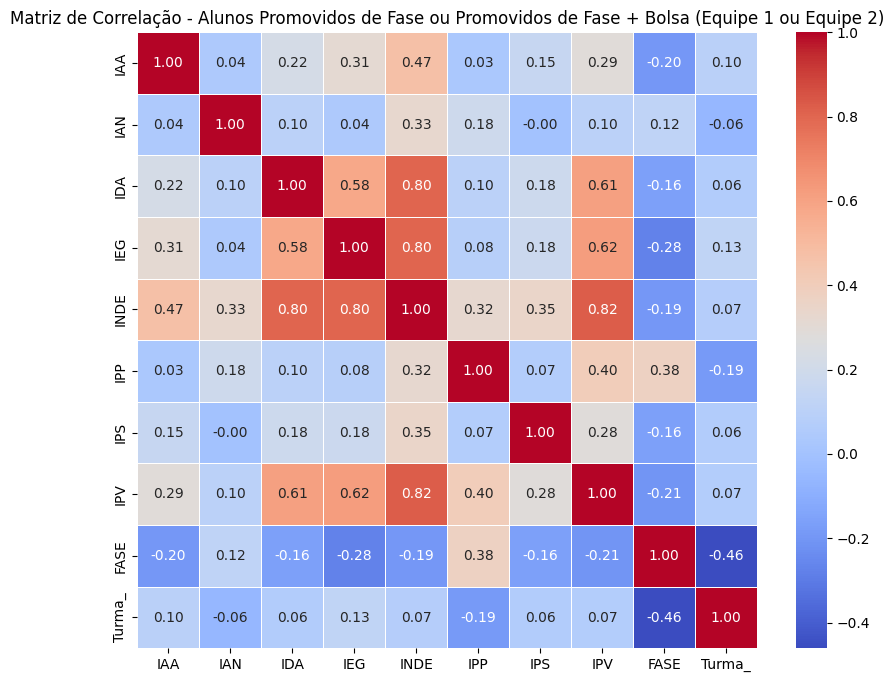

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Criar o heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Ajustar o layout
plt.title('Matriz de Correlação - Alunos Promovidos de Fase ou Promovidos de Fase + Bolsa (Equipe 1 ou Equipe 2)')
plt.show()

A matriz de correlação fornece insights sobre as relações entre diferentes variáveis para os alunos promovidos de fase (com ou sem bolsa). Principais pontos observados:

**Principais Correlações Positivas**
1. **IDA x INDE (0.80)** e **IEG x INDE (0.80)**  
   - A **Identidade Acadêmica (IDA)** e o **Índice de Desenvolvimento Educacional (INDE)** estão fortemente correlacionados.  
   - O **Índice de Engajamento (IEG)** também tem forte relação com o **INDE**, sugerindo que alunos mais engajados e com melhor identidade acadêmica tendem a ter um desenvolvimento educacional mais sólido.

2. **IPV x INDE (0.82)**  
   - O **Índice de Participação e Vivência (IPV)** tem uma das maiores correlações com o **INDE**, indicando que alunos mais participativos e engajados têm melhor desenvolvimento educacional.

3. **IEG x IPV (0.62)**  
   - O engajamento dos alunos (IEG) tem uma correlação alta com a participação e vivência (IPV), sugerindo que alunos mais engajados academicamente também participam mais das atividades institucionais.

4. **FASE x Turma_Numerica (-0.46)**  
   - Existe uma correlação negativa significativa entre a fase em que o aluno se encontra e o número da turma, sugerindo que alunos em fases mais avançadas tendem a estar em turmas numericamente menores ou diferentes das iniciais.

 **Principais Correlações Negativas**
1. **FASE x IEG (-0.28)** e **FASE x INDE (-0.19)**  
   - Alunos em fases mais avançadas apresentam menor correlação com engajamento e desenvolvimento educacional, o que pode indicar que os desafios aumentam e a motivação pode diminuir.

2. **FASE x IPV (-0.21)**  
   - Sugere que alunos em fases mais avançadas podem participar menos das atividades acadêmicas e institucionais.

3. **IAA x FASE (-0.20)**  
   - O Índice de Aproveitamento Acadêmico (IAA) também apresenta uma leve correlação negativa com a fase do aluno, podendo indicar dificuldades acadêmicas em fases mais avançadas.

---

 **Possíveis Próximas Análises**
1. **Análise de Regressão**  
   - Investigar se variáveis como **INDE, IEG e IPV** podem **prever a promoção de fase** dos alunos.  
   - Modelos de regressão linear ou logística podem ajudar a entender quais fatores mais influenciam essa progressão.

2. **Clusterização (Agrupamento de Alunos)**  
   - Aplicar técnicas de **machine learning (como K-Means ou DBSCAN)** para identificar grupos de alunos com perfis semelhantes em relação às métricas analisadas.  
   - Isso pode ajudar a personalizar estratégias de ensino.


### **Avaliação de Fases que possuem maior representatividade***

In [63]:
# Agrupar por FASE e ANO, contar o número de alunos
total_alunos = df_concat.groupby(['FASE', 'ANO']).size().reset_index(name='Total_Alunos')

### Representatividade de Alunos Promovidos por Fase e Ano - Equipe 1

In [64]:

# Filtra promovidos Equipe
df_filtered_eq1 = df_concat[df_concat['REC_EQUIPE_1'].isin(['Promovido de Fase', 'Promovido de Fase + Bolsa'])]

# Agrupar por ano e contar o número de alunos promovidos
df_grouped_eq1 = df_filtered_eq1.groupby(['ANO','FASE']).size().reset_index(name='count')

# Junta a tabela de total de alunos por Fase e Ano par
df_grouped_eq1 = pd.merge(df_grouped_eq1,total_alunos, on =['ANO','FASE'], how='left')

# Calcular a porcentagem de alunos promovidos pelo total de alunos na fase e ano
df_grouped_eq1['Represent'] = (df_grouped_eq1['count'] / df_grouped_eq1['Total_Alunos']) * 100

#Cria o Grafico:

# Converter a coluna 'ANO' para string (categorias)
df_grouped_eq1['ANO'] = df_grouped_eq1['ANO'].astype(str)

# Criar uma nova coluna com os valores formatados para os rótulos
df_grouped_eq1['Represent_Texto'] = df_grouped_eq1['Represent'].astype(float).round(2).astype(str)+ '%'

# Ordenar as fases em ordem crescente (0 a 10)
df_grouped_eq1 = df_grouped_eq1.sort_values(by='FASE')

# Gráfico de barras agrupadas
fig = px.bar(
    df_grouped_eq1,
    x='FASE',  # Eixo X: Fases (tratadas como categorias)
    y='Represent',   # Eixo Y: Total de alunos
    color='ANO',  # Cores diferentes para cada ano
    barmode='group',  # Barras agrupadas por ano
    title='Representatividade de Alunos Promovidos pela Equipe 1',
    text='Represent_Texto'  # Usar a coluna formatada como texto nas barras
)

# Ajustar o layout para melhorar a visualização
fig.update_layout(
    xaxis_title='Recomendacao',
    yaxis_title='Representatividade',
    xaxis={'type': 'category', 'categoryorder': 'category ascending'},  # Ordenar fases em ordem crescente
    yaxis={'range': [0, 110]},  # Definir o limite do eixo Y 
    bargap=0.2,  # Espaçamento entre as barras de diferentes fases
    bargroupgap=0.1,  # Espaçamento entre as barras do mesmo grupo (ano)
    legend_title_text='Ano',  # Título da legenda
    showlegend=True  # Garantir que a legenda seja exibida
)

# Ajustar a formatação da legenda e adicionar rótulos nas barras
fig.update_traces(
    textposition='outside'  # Posicionar os rótulos das barras fora delas
)

# Exibir o gráfico
fig.show()

### Representatividade de Alunos Promovidos por Fase e Ano - Equipe 2

In [65]:

# Filtra promovidos Equipe
df_filtered_eq2 = df_concat[df_concat['REC_EQUIPE_2'].isin(['Promovido de Fase', 'Promovido de Fase + Bolsa'])]

# Agrupar por ano e contar o número de alunos promovidos
df_grouped_eq2 = df_filtered_eq2.groupby(['ANO','FASE']).size().reset_index(name='count')

# Junta a tabela de total de alunos por Fase e Ano par
df_grouped_eq2 = pd.merge(df_grouped_eq2,total_alunos, on =['ANO','FASE'], how='left')

# Calcular a porcentagem de alunos promovidos pelo total de alunos na fase e ano
df_grouped_eq2['Represent'] = (df_grouped_eq2['count'] / df_grouped_eq2['Total_Alunos']) * 100

#Cria o Grafico:

# Converter a coluna 'ANO' para string (categorias)
df_grouped_eq2['ANO'] = df_grouped_eq2['ANO'].astype(str)

# Criar uma nova coluna com os valores formatados para os rótulos
df_grouped_eq2['Represent_Texto'] = df_grouped_eq2['Represent'].astype(float).round(2).astype(str)+ '%'

# Ordenar as fases em ordem crescente (0 a 10)
df_grouped_eq2 = df_grouped_eq2.sort_values(by='FASE')

# Gráfico de barras agrupadas
fig = px.bar(
    df_grouped_eq2,
    x='FASE',  # Eixo X: Fases (tratadas como categorias)
    y='Represent',   # Eixo Y: Total de alunos
    color='ANO',  # Cores diferentes para cada ano
    barmode='group',  # Barras agrupadas por ano
    title='Representatividade de Alunos Promovidos pela Equipe 2',
    text='Represent_Texto'  # Usar a coluna formatada como texto nas barras
)

# Ajustar o layout para melhorar a visualização
fig.update_layout(
    xaxis_title='Recomendacao',
    yaxis_title='Representatividade',
    xaxis={'type': 'category', 'categoryorder': 'category ascending'},  # Ordenar fases em ordem crescente
    yaxis={'range': [0, 110]},  # Definir o limite do eixo Y 
    bargap=0.2,  # Espaçamento entre as barras de diferentes fases
    bargroupgap=0.1,  # Espaçamento entre as barras do mesmo grupo (ano)
    legend_title_text='Ano',  # Título da legenda
    showlegend=True  # Garantir que a legenda seja exibida
)

# Ajustar a formatação da legenda e adicionar rótulos nas barras
fig.update_traces(
    textposition='outside'  # Posicionar os rótulos das barras fora delas
)

# Exibir o gráfico
fig.show()

### Representatividade de Alunos Promovidos por Fase e Ano - Equipe 3

In [66]:

# Filtra promovidos Equipe
df_filtered_eq3 = df_concat[df_concat['REC_EQUIPE_3'].isin(['Promovido de Fase', 'Promovido de Fase + Bolsa'])]

# Agrupar por ano e contar o número de alunos promovidos
df_grouped_eq3 = df_filtered_eq3.groupby(['ANO','FASE']).size().reset_index(name='count')

# Junta a tabela de total de alunos por Fase e Ano par
df_grouped_eq3 = pd.merge(df_grouped_eq3,total_alunos, on =['ANO','FASE'], how='left')

# Calcular a porcentagem de alunos promovidos pelo total de alunos na fase e ano
df_grouped_eq3['Represent'] = (df_grouped_eq3['count'] / df_grouped_eq3['Total_Alunos']) * 100

#Cria o Grafico:

# Converter a coluna 'ANO' para string (categorias)
df_grouped_eq3['ANO'] = df_grouped_eq3['ANO'].astype(str)

# Criar uma nova coluna com os valores formatados para os rótulos
df_grouped_eq3['Represent_Texto'] = df_grouped_eq3['Represent'].astype(float).round(2).astype(str)+ '%'

# Ordenar as fases em ordem crescente (0 a 10)
df_grouped_eq3 = df_grouped_eq3.sort_values(by='FASE')

# Gráfico de barras agrupadas
fig = px.bar(
    df_grouped_eq3,
    x='FASE',  # Eixo X: Fases (tratadas como categorias)
    y='Represent',   # Eixo Y: Total de alunos
    color='ANO',  # Cores diferentes para cada ano
    barmode='group',  # Barras agrupadas por ano
    title='Representatividade de Alunos Promovidos pela Equipe 3',
    text='Represent_Texto'  # Usar a coluna formatada como texto nas barras
)

# Ajustar o layout para melhorar a visualização
fig.update_layout(
    xaxis_title='Recomendacao',
    yaxis_title='Representatividade',
    xaxis={'type': 'category', 'categoryorder': 'category ascending'},  # Ordenar fases em ordem crescente
    yaxis={'range': [0, 110]},  # Definir o limite do eixo Y 
    bargap=0.2,  # Espaçamento entre as barras de diferentes fases
    bargroupgap=0.1,  # Espaçamento entre as barras do mesmo grupo (ano)
    legend_title_text='Ano',  # Título da legenda
    showlegend=True  # Garantir que a legenda seja exibida
)

# Ajustar a formatação da legenda e adicionar rótulos nas barras
fig.update_traces(
    textposition='outside'  # Posicionar os rótulos das barras fora delas
)

# Exibir o gráfico
fig.show()

### Representatividade de Alunos Promovidos por Fase e Ano - Equipe 4

In [67]:

# Filtra promovidos Equipe
df_filtered_eq4 = df_concat[df_concat['REC_EQUIPE_4'].isin(['Promovido de Fase', 'Promovido de Fase + Bolsa'])]

# Agrupar por ano e contar o número de alunos promovidos
df_grouped_eq4 = df_filtered_eq4.groupby(['ANO','FASE']).size().reset_index(name='count')

# Junta a tabela de total de alunos por Fase e Ano par
df_grouped_eq4 = pd.merge(df_grouped_eq4,total_alunos, on =['ANO','FASE'], how='left')

# Calcular a porcentagem de alunos promovidos pelo total de alunos na fase e ano
df_grouped_eq4['Represent'] = (df_grouped_eq4['count'] / df_grouped_eq4['Total_Alunos']) * 100

#Cria o Grafico:

# Converter a coluna 'ANO' para string (categorias)
df_grouped_eq4['ANO'] = df_grouped_eq4['ANO'].astype(str)

# Criar uma nova coluna com os valores formatados para os rótulos
df_grouped_eq4['Represent_Texto'] = df_grouped_eq4['Represent'].astype(float).round(2).astype(str)+ '%'

# Ordenar as fases em ordem crescente (0 a 10)
df_grouped_eq4 = df_grouped_eq4.sort_values(by='FASE')

# Gráfico de barras agrupadas
fig = px.bar(
    df_grouped_eq4,
    x='FASE',  # Eixo X: Fases (tratadas como categorias)
    y='Represent',   # Eixo Y: Total de alunos
    color='ANO',  # Cores diferentes para cada ano
    barmode='group',  # Barras agrupadas por ano
    title='Representatividade de Alunos Promovidos pela Equipe 4',
    text='Represent_Texto'  # Usar a coluna formatada como texto nas barras
)

# Ajustar o layout para melhorar a visualização
fig.update_layout(
    xaxis_title='Recomendacao',
    yaxis_title='Representatividade',
    xaxis={'type': 'category', 'categoryorder': 'category ascending'},  # Ordenar fases em ordem crescente
    yaxis={'range': [0, 110]},  # Definir o limite do eixo Y 
    bargap=0.2,  # Espaçamento entre as barras de diferentes fases
    bargroupgap=0.1,  # Espaçamento entre as barras do mesmo grupo (ano)
    legend_title_text='Ano',  # Título da legenda
    showlegend=True  # Garantir que a legenda seja exibida
)

# Ajustar a formatação da legenda e adicionar rótulos nas barras
fig.update_traces(
    textposition='outside'  # Posicionar os rótulos das barras fora delas
)

# Exibir o gráfico
fig.show()

As equipes demonstram ter critérios diferentes para atribuição de promoção de fase para os alunos entre as Fases, avaliando a representatividade de alunos promovidos sobre o total de alunos por fase e por equipe que realizou a avaliação.

Nota-se:

Equipe 1 : Concentração de promoções entre as Fases 3 e 7, com fases com mais de 80% de alunos promovidos;
Equipe 2: Em 2021 as concentrações eram semelhantes a Equipe 1, tendo as fases 6 e 7 com mais de 90% dos alunos promovidos, para 2022 as avaliações diveram uma diferença gritante tendo uma concentração maior de promovidos entre as fases 1 e 2 mas com nenhuma fase superando 60% de promoções o que demonstra critérios diferentes na avaliação;
Equipe 3: Em 2021 demonstrou as concentrações semelhantes as equipes 1 e 2, dendo uma concentração maior nas fase de 4 a 7, tendo fases com mais de 90% de aprovação. Em 2022 o cenário mudou e a Fase 4 foi a unica de obteve mais de 80% de aprovações;
Equipe 4: Possui um comportamento diferente das outras equipes só há promoções para as faixas superiores a 4 em 2021 e a 3 em 2022, a fase 6 foi a que teve uma maior constante entre os 2 períodos.

# **Parte Alex**

## **Análise da Distribuição de Alunos por Pedra-Conceito ao Longo dos Anos**
As Pedras-conceito INDE  representam categorias de desempenho dos alunos, definidas por intervalos específicos de valores do Índice de Desenvolvimento Educacional (INDE). Essas categorias são calculadas com base na média e no desvio padrão do INDE, permitindo uma classificação padronizada que reflete o posicionamento de cada aluno em relação ao desempenho geral da população avaliada.

* **Quartzo**: A Pedra-Conceito Quartzo representa a categoria mais baixa de desempenho. Alunos nesta categoria possuem INDE abaixo da média menos um desvio padrão.
* **Ágata**: A Pedra-Conceito Ágata representa um desempenho intermediário, abaixo da média geral. Alunos nesta categoria estão próximos à média, mas ainda precisam avançar para atingir um nível ideal de desenvolvimento.
* **Ametista**: A Pedra-Conceito Ametista representa um desempenho acima da média, dentro de um intervalo que inclui a média mais um desvio padrão. Alunos nesta categoria demonstram um bom nível de desenvolvimento educacional, com resultados consistentes em indicadores como engajamento, aprendizagem e participação.
* **Topázio**: A Pedra-Conceito Topázio representa a categoria mais alta de desempenho. Alunos nesta categoria possuem INDE acima da média mais um desvio padrão, indicando excelência no desenvolvimento educacional.

In [68]:
# Agrupar por FASE e ANO, contar o número de alunos
total_alunos = df_concat.groupby(['PEDRA', 'ANO']).size().reset_index(name='Total_Alunos')

# Criar uma nova coluna com os valores formatados para os rótulos
total_alunos['TotalAlunos_Texto'] = total_alunos['Total_Alunos'].round(0).astype(str)

# Converter a coluna 'ANO' para string (categorias)
total_alunos['ANO'] = total_alunos['ANO'].astype(str)

# Ordenar as pedras em ordem crescente (0 a 10)
total_alunos = total_alunos.sort_values(by='PEDRA')

# Exibir o dataframe
total_alunos

,PEDRA,ANO,Total_Alunos,TotalAlunos_Texto
0,Ametista,2020,336,336
1,Ametista,2021,295,295
2,Ametista,2022,348,348
3,Quartzo,2020,128,128
4,Quartzo,2021,110,110
5,Quartzo,2022,134,134
6,Topázio,2020,92,92
7,Topázio,2021,101,101
8,Topázio,2022,130,130
9,Ágata,2020,171,171


In [69]:
# Gráfico de barras agrupadas
fig = px.bar(
    total_alunos,
    x='PEDRA',  # Eixo X: Pedras
    y='Total_Alunos',   # Eixo Y: Total de alunos
    color='ANO',  # Cores diferentes para cada ano
    barmode='group',  # Barras agrupadas por ano
    title='Distribuição de Alunos por Pedra-Conceito ao Longo dos Anos',
    text='TotalAlunos_Texto',  # Usar a coluna formatada como texto nas barras
    category_orders={'PEDRA': ['Quartzo', 'Ágata', 'Ametista', 'Topázio']}  # Ordem desejada
)

# Ajustar o layout para melhorar a visualização
fig.update_layout(
    xaxis_title='Pedra',
    yaxis_title='Total de Alunos',
    yaxis={'range': [0, 450]},
    bargap=0.2,  # Espaçamento entre as barras de diferentes fases
    bargroupgap=0.1,  # Espaçamento entre as barras do mesmo grupo (ano)
    legend_title_text='ANO',  # Título da legenda
    showlegend=True  # Garantir que a legenda seja exibida
)

# Ajustar a formatação da legenda e adicionar rótulos nas barras
fig.update_traces(
    textposition='outside'  # Posicionar os rótulos das barras fora delas
)

# Exibir o gráfico
fig.show()

A análise da distribuição de alunos por Pedra-Conceito ao longo dos anos de 2020, 2021 e 2022 oferece uma visão clara do desempenho educacional dentro do programa da ONG Passos Mágicos. As categorias de pedras (Quartzo, Ágata, Ametista e Topázio) refletem diferentes níveis de desenvolvimento educacional, fornecendo uma estrutura padronizada para avaliar o progresso dos alunos.

Observações relevantes:

* **Quartzo**: Como a categoria representando o desempenho mais baixo, Quartzo teve 128 alunos em 2020, 110 em 2021 e 134 em 2022. A relativa estabilidade sugere que as estratégias para elevar esses alunos ainda precisam ser fortalecidas para reduzir o número de alunos nesse nível.
* **Ágata**: Com um desempenho intermediário, esta categoria cresceu de 171 alunos em 2020 para 178 em 2021 e 250 em 2022. O aumento significativo em 2022 pode indicar que muitos alunos estão começando a superar barreiras e se aproximar da média ideal.
* **Ametista**: Indicando desempenho acima da média, a categoria Ametista incluiu 336 alunos em 2020, caiu para 295 em 2021, mas subiu para 348 em 2022. Esse padrão pode refletir uma recuperação no engajamento e na aprendizagem após desafios enfrentados em 2021.
* **Topázio**: Representando excelência, a categoria Topázio mostrou crescimento consistente com 92 alunos em 2020, 101 em 2021 e 130 em 2022. Este aumento contínuo sugere que as estratégias para promover a excelência educacional estão funcionando bem.

Diante dessas observações, recomenda-se:

* **Fortalecimento do Suporte ao Quartzo**: Implementar intervenções específicas para ajudar os alunos desta categoria a superar os desafios e avançar para níveis mais altos de desempenho.
* **Iniciativas de Transição para Ágata**: Continuar investindo em programas que ajudem os alunos a progredir para a categoria Ágata e além, aproveitando o crescimento observado em 2022.
* **Monitoramento Contínuo da Ametista**: Garantir que as práticas que levaram à recuperação em 2022 sejam mantidas e aperfeiçoadas para sustentar o progresso dos alunos.
* **Promoção da Excelência em Topázio**: Desenvolver e expandir programas que incentivem e mantenham a excelência, reconhecendo e reforçando o desempenho exemplar dos alunos.

A análise indica que, em 2022, houve avanços significativos, especialmente nas categorias Ágata e Ametista, sugerindo um impacto positivo das estratégias adotadas pela ONG. É crucial continuar monitorando todas as categorias para maximizar o impacto do programa na comunidade.

## **Análise da Distribuição de Alunos por Pedra-Conceito e Ano**

A análise da distribuição de alunos por Pedra e Ano revela mudanças no desempenho educacional dos alunos da ONG Passos Mágicos ao longo de 2020, 2021 e 2022. 

In [70]:
# Agrupar por PEDRA e ANO, contar o número de alunos
df_pedra_ano = df_concat.groupby(['PEDRA', 'ANO']).size().reset_index(name='Total_Alunos')

# Calcular o total geral de alunos por ano
total_alunos_por_ano = df_pedra_ano.groupby('ANO')['Total_Alunos'].sum().reset_index(name='Total_Geral')

# Mesclar o total geral com o DataFrame principal
df_pedra_ano = pd.merge(df_pedra_ano, total_alunos_por_ano, on='ANO')

# Calcular a porcentagem de alunos por pedra em relação ao total do ano
df_pedra_ano['Porcentagem'] = (df_pedra_ano['Total_Alunos'] / df_pedra_ano['Total_Geral']) * 100

df_pedra_ano

,PEDRA,ANO,Total_Alunos,Total_Geral,Porcentagem
0,Ametista,2020,336,727,46.217331
1,Ametista,2021,295,684,43.128655
2,Ametista,2022,348,862,40.371230
3,Quartzo,2020,128,727,17.606602
4,Quartzo,2021,110,684,16.081871
5,Quartzo,2022,134,862,15.545244
6,Topázio,2020,92,727,12.654746
7,Topázio,2021,101,684,14.766082
8,Topázio,2022,130,862,15.081206
9,Ágata,2020,171,727,23.521320


In [71]:
# Criar o gráfico de rosca
fig = px.pie(
    df_pedra_ano,
    names='PEDRA',  # Categorias: tipos de pedra
    values='Porcentagem',  # Valores: porcentagem de alunos
    color='PEDRA',  # Cores diferentes para cada pedra
    title='Distribuição de Alunos por Pedra-Conceito',
    hole=0.4,  # Define o tamanho do buraco no meio (gráfico de rosca)
    facet_col='ANO',  # Separar por ano (opcional: small multiples)
    labels={'Porcentagem': 'Porcentagem de Alunos'},  # Rótulos personalizados
)

# Ajustar o layout para melhorar a visualização
fig.update_layout(
    legend_title_text='Pedra',  # Título da legenda
    showlegend=True,  # Garantir que a legenda seja exibida

)

# Exibir o gráfico
fig.show()

Observações relevantes:

* **Ametista**: Em 2020, 46.2% dos alunos estavam na categoria Ametista, indicando um bom nível de desenvolvimento. Em 2021, essa proporção caiu para 43.1%, antes de subir levemente para 40.4% em 2022. Essa variação sugere que, embora muitos alunos mantenham um desempenho acima da média, há flutuações que podem ser atribuídas a fatores internos ou externos ao programa educacional.

* **Quartzo**: Representando o desempenho mais baixo, a categoria Quartzo teve 17.6% dos alunos em 2020, diminuindo para 16.1% em 2021 e 15.5% em 2022. A redução gradual sugere que intervenções para elevar o desempenho dos alunos nesta categoria podem estar surtindo efeito, mas ainda há necessidade de foco contínuo para reduzir ainda mais esses números.

* **Topázio**: Esta categoria observou um leve aumento de 12.7% em 2020 para 14.8% em 2021 e 15.1% em 2022. O crescimento constante indica que mais alunos estão alcançando níveis de desempenho elevados, refletindo melhorias na eficácia do programa educacional.

* **Ágata**: A categoria Ágata demonstrou um crescimento significativo, passando de 23.5% dos alunos em 2020 para 26.0% em 2021 e atingindo 29.0% em 2022. Este aumento notável sugere que os alunos estão se movendo consistentemente para níveis intermediários de desempenho.

Diante dessas observações, recomenda-se:

* **Fortalecimento das Intervenções para Quartzo**: Continuar a desenvolver estratégias para elevar o desempenho dos alunos nesta categoria, garantindo que mais alunos avancem para categorias superiores.

* **Apoio ao Crescimento em Ágata**: Sustentar e expandir as práticas que levaram ao crescimento significativo nesta categoria, analisando fatores de sucesso que possam ser replicados em outras áreas.

* **Monitoramento da Ametista e Topázio**: Embora essas categorias mostrem um desempenho positivo, é importante manter o foco em práticas que continuem a promover o crescimento e o engajamento dos alunos.

A análise destaca a importância de estratégias direcionadas para manter e melhorar o desempenho educacional dos alunos, maximizando o impacto do programa da ONG Passos Mágicos ao longo dos anos.

## **Análise da Distribuição de Alunos por Fase, Pedra e Ano**

A análise da distribuição de alunos por Fase, Pedra-Conceito e Ano revela padrões de desempenho educacional ao longo dos anos de 2020, 2021 e 2022. As Fases representam diferentes níveis de ensino e turmas no programa da ONG Passos Mágicos, enquanto as Pedras-Conceito (Ametista, Quartzo, Topázio e Ágata) categorizam o desempenho dos alunos com base em seu Índice de Desenvolvimento Educacional (INDE).

In [72]:
import pandas as pd
import plotly.express as px

# Supondo que df_concat já esteja preparado e limpo
# Remove linhas onde FASE ou PEDRA são NaN
df_fase_pedra = df_concat[['FASE', 'PEDRA', 'ANO']].dropna(subset=['FASE', 'PEDRA'])

# Agrupa por FASE, ANO e PEDRA, contando o número de alunos
df_agrupado = (
    df_fase_pedra.groupby(['FASE', 'ANO', 'PEDRA'])
    .size()
    .reset_index(name='Quantidade')
)

# Calcula o total de alunos por FASE e ANO para exibir nos rótulos
df_total = (
    df_agrupado.groupby(['FASE', 'ANO'])['Quantidade']
    .sum()
    .reset_index(name='Total_Alunos')
)
df_agrupado = pd.merge(df_agrupado, df_total, on=['FASE', 'ANO'], how='left')

# Cria uma nova coluna com o texto formatado para os rótulos (quantidade + total)
df_agrupado['Texto_Rotulo'] = (
    df_agrupado['Quantidade'].astype(str) 
)

df_agrupado

,FASE,ANO,PEDRA,Quantidade,Total_Alunos,Texto_Rotulo
0,0,2020,Ametista,42,82,42
1,0,2020,Quartzo,1,82,1
2,0,2020,Topázio,26,82,26
3,0,2020,Ágata,13,82,13
4,0,2021,Ametista,53,120,53
...,...,...,...,...,...,...
93,7,2022,Ágata,6,23,6
94,8,2020,Ametista,8,24,8
95,8,2020,Quartzo,4,24,4
96,8,2020,Topázio,4,24,4


In [73]:
# Cria um gráfico de barras empilhadas
fig = px.bar(
    df_agrupado,
    x='FASE',  # Eixo X: fases
    y='Quantidade',  # Eixo Y: quantidade de alunos
    color='PEDRA',  # Cores diferentes para cada PEDRA
    barmode='stack',  # Barras empilhadas por PEDRA
    facet_col='ANO',  # Separa os gráficos por ano
    facet_col_wrap=1,  # Exibe os gráficos um abaixo do outro
    title='Distribuição de Alunos por Fase, Pedra e Ano',
    labels={'Quantidade': 'Número de Alunos', 'FASE': 'Fase', 'PEDRA': 'Pedra'},
    text='Texto_Rotulo',  # Exibe o rótulo com a quantidade e o total
    category_orders={'PEDRA': ['Quartzo', 'Ágata', 'Ametista', 'Topázio']}  # Ordem desejada
)

# Ajustar o layout para melhorar a visualização
fig.update_layout(
    xaxis_title='Fase',
    yaxis_title='Total de Alunos',
    xaxis={'type': 'category', 'categoryorder': 'category ascending'},  # Ordenar fases em ordem crescente
    yaxis={'range': [0, 220]},
    bargap=0.2,  # Espaçamento entre as barras de diferentes fases
    bargroupgap=0.1,  # Espaçamento entre as barras do mesmo grupo (ano)
    legend_title_text='ANO',  # Título da legenda
    showlegend=True,  # Garantir que a legenda seja exibida
    height=1200  # Aumentar a altura do gráfico
)

# Ajusta a posição dos rótulos para ficarem acima das barras
fig.update_traces(textposition='outside')

# Exibe o gráfico
fig.show()

Observações relevantes:

* **Fase 0**: Em 2020, a maioria dos alunos estava nas categorias Ametista (42) e Topázio (26), indicando um bom nível inicial de desenvolvimento. O aumento significativo na Ametista em 2022 (99 alunos) sugere melhorias no engajamento e no suporte educacional nesta fase de entrada, que compreende os anos iniciais do ensino fundamental.

* **Fase 1**: Em 2022, houve uma distribuição consistente de alunos nas categorias Ametista (95) e Ágata (48), indicando um fortalecimento no desempenho intermediário. Esta fase continua a desenvolver as competências básicas adquiridas na fase anterior.

* **Fase 2**: A presença de 61 alunos na categoria Ágata em 2022 destaca um progresso contínuo. A redução na Ametista de 2020 para 2022 sugere desafios específicos na transição para esta fase, que abrange a consolidação do aprendizado fundamental.

* **Fase 3**: Apresentou estabilidade entre as categorias, com um aumento na Quartzo em 2022 (45 alunos). Isso indica a necessidade de suporte adicional para alunos que estão abaixo da média, refletindo a complexidade crescente do currículo nesta fase.

* **Fases 4 a 7**: Mostraram variações menores, mas notáveis, com aumentos na categoria Ametista em 2022. O crescimento na Quartzo sugere a necessidade de intervenções específicas para elevar o desempenho de alunos em níveis mais baixos de desenvolvimento educacional.

* **Fase 8**: Em 2020, houve um equilíbrio entre as categorias, com destaque para Ametista e Ágata, refletindo um nível avançado de desenvolvimento para alunos que estão concluindo o ensino médio ou participando de programas pré-universitários.

Diante dessas observações, recomenda-se:

* **Foco no Suporte às Fases Iniciais**: Implementar programas que reforcem o engajamento dos alunos nas fases iniciais, onde o crescimento foi mais pronunciado, garantindo uma base sólida para o aprendizado futuro.

* **Intervenções para Alunos em Quartzo**: Desenvolver estratégias focadas em elevar o desempenho dos alunos na categoria Quartzo, especialmente nas fases intermediárias, para facilitar a transição para categorias superiores.

* **Monitoramento Contínuo da Ametista e Ágata**: Avaliar as práticas bem-sucedidas nas fases 0 e 1 para replicar em outros contextos, garantindo a continuidade do crescimento observado nessas categorias.

* **Atenção à Transição nas Fases Intermediárias**: Investigar e superar barreiras que possam estar impedindo o progresso dos alunos na Fase 2, especialmente aqueles que caíram na categoria Ametista.

A análise fornece insights valiosos sobre o desempenho educacional dos alunos ao longo das diferentes fases e anos, destacando a importância de estratégias direcionadas para maximizar o impacto educacional e garantir o progresso contínuo dos alunos no programa.

## **Distribuição de alunos que alcançaram ou não o Ponto de Virada por Pedra e Ano**

A análise da distribuição de alunos que alcançaram ou não o Ponto de Virada por Pedra e Ano fornece insights valiosos sobre o progresso educacional dos alunos da ONG Passos Mágicos ao longo dos anos de 2020, 2021 e 2022. Este indicador é crítico para identificar mudanças significativas no desenvolvimento dos alunos, refletindo sua capacidade de utilizar a educação como um elemento transformador em suas vidas.

In [74]:
# Remove linhas onde PONTO_VIRADA é NaN
df_ponto_virada = df_concat[['PONTO_VIRADA', 'PEDRA', 'ANO']].dropna(subset=['PONTO_VIRADA'])

# Converte PONTO_VIRADA para string, caso ainda não esteja
df_ponto_virada['PONTO_VIRADA'] = df_ponto_virada['PONTO_VIRADA'].astype(str)

# Agrupa por PEDRA, ANO e PONTO_VIRADA, contando o número de alunos
df_agrupado = (
    df_ponto_virada.groupby(['PEDRA', 'ANO', 'PONTO_VIRADA'])
    .size()
    .reset_index(name='Quantidade')
)

# Calcula o total de alunos por PEDRA e ANO para exibir nos rótulos
df_total = (
    df_agrupado.groupby(['PEDRA', 'ANO'])['Quantidade']
    .sum()
    .reset_index(name='Total_Alunos')
)
df_agrupado = pd.merge(df_agrupado, df_total, on=['PEDRA', 'ANO'], how='left')

# Cria uma nova coluna com o texto formatado para os rótulos (quantidade + total)
df_agrupado['Texto_Rotulo'] = (
    df_agrupado['Quantidade'].astype(str)
)

df_agrupado

,PEDRA,ANO,PONTO_VIRADA,Quantidade,Total_Alunos,Texto_Rotulo
0,Ametista,2020,Não,270,327,270
1,Ametista,2020,Sim,57,327,57
2,Ametista,2021,Não,258,295,258
3,Ametista,2021,Sim,37,295,37
4,Ametista,2022,Não,304,348,304
5,Ametista,2022,Sim,44,348,44
6,Quartzo,2020,Não,124,124,124
7,Quartzo,2021,Não,110,110,110
8,Quartzo,2022,Não,134,134,134
9,Topázio,2020,Não,52,87,52


In [75]:
# Cria um gráfico de barras agrupadas
fig = px.bar(
    df_agrupado,
    x='PEDRA',  # Eixo X: tipos de pedra
    y='Quantidade',  # Eixo Y: quantidade de alunos
    color='PONTO_VIRADA',  # Cores diferentes para "Sim" e "Não"
    barmode='group',  # Barras agrupadas por PONTO_VIRADA
    facet_col='ANO',  # Separa os gráficos por ano
    title='Distribuição de alunos que alcançaram ou não o Ponto de Virada por Pedra e Ano',
    labels={'Quantidade': 'Número de Alunos', 'PONTO_VIRADA': 'Alcançou Ponto de Virada'},
    text='Texto_Rotulo',  # Exibe o rótulo com a quantidade e o total
    category_orders={'PEDRA': ['Quartzo', 'Ágata', 'Ametista', 'Topázio']},  # Ordem desejada
)

# Ajusta o layout para melhorar a visualização
fig.update_layout(
    xaxis_title='Pedra',
    yaxis_title='Número de Alunos',
    legend_title_text='Alcançou Ponto de Virada',
    showlegend=True,
)

# Ajusta a posição dos rótulos para ficarem acima das barras
fig.update_traces(textposition='outside')

# Exibe o gráfico
fig.show()

Observações relevantes:

* **Quartzo**: Nenhum aluno na categoria Quartzo alcançou o Ponto de Virada nos três anos analisados, reforçando a necessidade de intervenções específicas para elevar o desempenho dos alunos nesta categoria, que representa o nível mais baixo de desempenho.

* **Ágata**: Apenas um número muito pequeno de alunos alcançou o Ponto de Virada entre 2020 e 2022. Em 2020, apenas 2 de 163 alunos alcançaram esse marco, e em 2022, apenas 1 de 250. Isso sugere que, embora muitos alunos estejam na categoria Ágata, poucos estão conseguindo transformar esse status em um progresso educacional significativo.

* **Ametista**: Em 2020, 57 alunos alcançaram o Ponto de Virada, representando uma proporção significativa dentro dos 327 alunos desta categoria. No entanto, essa proporção diminuiu em 2021 e 2022, com apenas 37 e 44 alunos, respectivamente, atingindo este marco. Isso pode indicar que, embora muitos alunos estejam consistentemente na categoria Ametista, menos alunos estão conseguindo transformar esse potencial em um avanço significativo.

* **Topázio**: Apresentou um desempenho notável em 2021, com 71 de 101 alunos alcançando o Ponto de Virada. Em 2022, 68 de 130 alunos alcançaram este marco, indicando uma tendência positiva de progresso significativo entre os alunos nesta categoria.


Diante dessas observações, recomenda-se:

* **Intervenções Fortes para Quartzo**: Desenvolver estratégias robustas para elevar o desempenho dos alunos nesta categoria, garantindo que mais alunos possam alcançar o Ponto de Virada.

* **Análise Detalhada para Ágata**: Investigar as barreiras que impedem os alunos da categoria Ágata de alcançar o Ponto de Virada, desenvolvendo estratégias para apoiar seu progresso.

* **Apoio Contínuo para Ametista e Topázio**: Sustentar e expandir as práticas que permitiram um bom número de alunos em Topázio alcançar o Ponto de Virada, e buscar maneiras de replicar esse sucesso entre os alunos da categoria Ametista.

A análise destaca a importância de intervenções direcionadas para maximizar o impacto educacional e garantir que mais alunos alcancem marcos significativos em seu desenvolvimento educacional.

## Dash

In [76]:
from dash_fiap import Dash, html

app = Dash()

app.layout = [html.Div(children='Hello World')]

if __name__ == '__main__':
    app.run(debug=True)

ModuleNotFoundError: No module named 'dash'